In [1]:
#Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
warnings.filterwarnings('ignore')


In [2]:
#Reading the datasets

adf=pd.read_csv("application_data.csv")
pdf=pd.read_csv("previous_application.csv")

In [3]:
#Checking the shape of data

print("Shape of Application Data is: ",end=" ")
print(adf.shape)
print("\nShape of Previous Application Data is: ",end=" ")
print(pdf.shape)

Shape of Application Data is:  (307511, 122)

Shape of Previous Application Data is:  (1670214, 37)


In [4]:
# Setting some options

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
sns.set(style="whitegrid")

In [5]:
#Inspecting the heads of the data

adf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
pdf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

### Cleaning Application Data

#### Removing duplicates in application data

In [7]:
adf.SK_ID_CURR.drop_duplicates(inplace=True)

In [8]:
adf.shape

(307511, 122)

As the number of remains same after removing the duplicates, there were no duplicates in the application data

#### Checking the percentage of missing values in the Application Dataset

In [9]:
#Columns having null values
nan_cols=[i for i in adf.columns if adf[i].isnull().any()]
print("There are "+str(len(nan_cols))+" columns having missing values")

There are 67 columns having missing values


Theoretically, the maximum allowed percentage of missing values in a column should be between 25-30% and we should drop the columns having missing values more that 30%. But just to be sure, we will confirm that we are not dropping a variable that might play importance in the analysis.

In [10]:
#Columns having more than 30% of the data

missing = adf.isnull().sum()
missing = missing[missing.values>(0.30*len(adf))]
print('Columns with more than 30% missing data')
missing=missing.apply(lambda x:x/len(adf)*100)
missing

Columns with more than 30% missing data


OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50

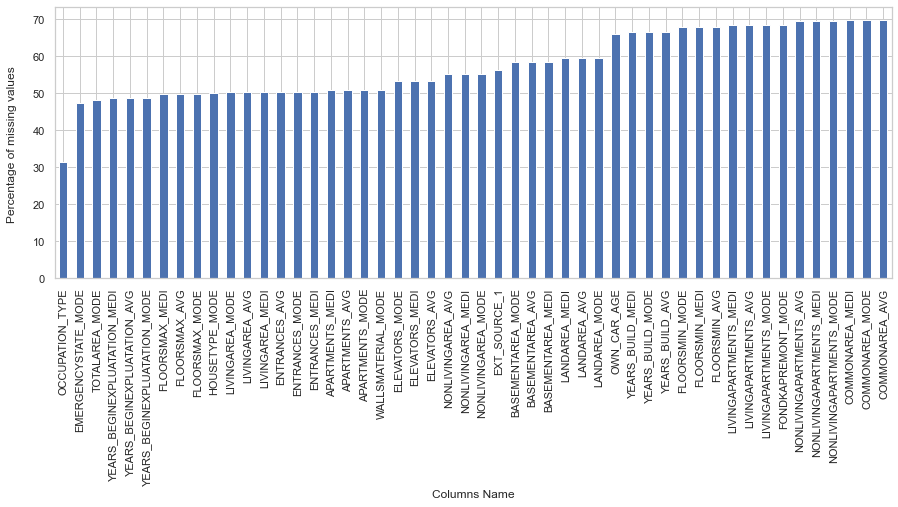

In [11]:
#Plotting the columns having more than 30% of missing values

plt.figure(figsize=[15,5])
missing.sort_values().plot.bar()
plt.xlabel("Columns Name")
plt.ylabel("Percentage of missing values \n")
plt.show()

As we see, a lot of columns have missing percentage greater that 30% and ideally we should drop these columns but one of the column named OCCUPATION_TYPE having 31.35% missing values might be usefull for our object and hence we will retain that column and drop all others having % missing values greater than 30%. We will also retain ext_source_1 for later calculations. There are 50 columns having missing values greater than 30% and we'll delete 48 of those columns.

In [12]:
#Dropping the columns

adf2=adf.drop(missing.index[3:],axis=1)
adf2=adf2.drop(["OWN_CAR_AGE"],axis=1)

In [13]:
missing=adf2.isnull().sum()
missing[missing.values!=0]

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DAYS_LAST_PHONE_CHANGE             1
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
dtype: int64

#### Handling the missing values for each column, starting with amount annuity. Even though the missing values aren't many, instead of dropping we'll replace the missing values by mean or median depending on whether the variable has outliers.

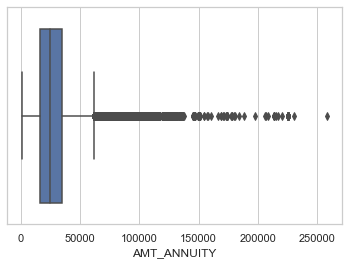

In [14]:
#Checking for outliers in the column

sns.boxplot(adf2.AMT_ANNUITY)
plt.show()

As we see from the boxplot that there are outliers, we will replace the missing values by median.

In [15]:
# Imputing the missing values by median

adf2["AMT_ANNUITY"].fillna(adf2.AMT_ANNUITY.median(),inplace=True)

Missing values for amt_goods_price

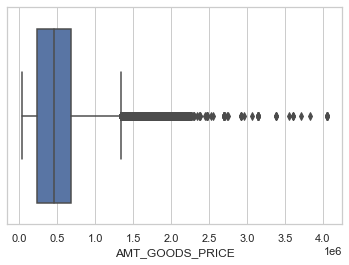

In [16]:
#Checking for outliers in the column

sns.boxplot(adf2.AMT_GOODS_PRICE)
plt.show()

As we see from the boxplot that there are outliers, we will replace the missing values by median.

In [17]:
# Imputing the missing values by median

adf2["AMT_GOODS_PRICE"].fillna(adf2.AMT_GOODS_PRICE.median(),inplace=True)

#### Missing values for Name_type_suite (who was accompanying client when he was applying for the loan)

In [18]:
adf2["NAME_TYPE_SUITE"].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [19]:
adf2["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
dtype: object

We will replace the nan values by Unaccompanied, the mode

In [20]:
# Imputing the missing values by mode
adf2["NAME_TYPE_SUITE"].fillna("Unaccompanied",inplace=True)

#### As there are nearly 96000 missing values in Occupation type variable, we will not be imputing the values using mode as it can make the analysis biased and hence we will replace the nan values with Not Specified.

In [21]:
adf2["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [22]:
adf2["OCCUPATION_TYPE"].fillna("Not Specified",inplace=True)

Replacing the cnt_fam_members by the median

In [23]:
adf2["CNT_FAM_MEMBERS"].fillna(adf2.CNT_FAM_MEMBERS.median(),inplace=True)

For ext_source 2 and ext_source 3 (normalized score), we will calculate the average of the two columns and make a seprate column and drop the pertaining columns

In [24]:
adf2['EXT_SCORE']=adf2[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
adf2=adf2.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1)

In [25]:
adf2.EXT_SCORE.isnull().sum()

172

#### We would be replacing these missing values with the mean

In [26]:
adf2.EXT_SCORE.fillna(adf2.EXT_SCORE.mean(),inplace=True)

Just 1 missing value in DAYS_LAST_PHONE_CHANGE, hence dropping this row.

In [27]:
adf2=adf2[~(adf2.DAYS_LAST_PHONE_CHANGE.isnull())]

#### CNT_SOCIAL_CIRCLE has 4 categories, let's look through these

In [28]:
social_circle=[i for i in adf2.columns if i.find('CNT_SOCIAL_CIRCLE')>0]
adf2[social_circle].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306489.000000             306489.000000   
mean                   1.422250                  0.143421   
std                    2.400991                  0.446699   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306489.000000             306489.000000  
mean                   1.405297                  0.100049  
std                    2.379806                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

Looking at the description table, we will replace the null values for these 4 columns with 0

In [29]:
adf2[social_circle]=adf2[social_circle].fillna(0)

#### Similarly, there are 6 categories for amt_req_credit

In [30]:
amt_req_credit=[i for i in adf2.columns if i.find('AMT_REQ_CREDIT')>-1]
adf2[amt_req_credit].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

Looking at the description table, we will replace the null values for these 6 columns with 0

In [31]:
adf2[amt_req_credit]=adf2[amt_req_credit].fillna(0)

#### Final Check for missing values

In [32]:
adf2.isnull().sum().sum()

0

There are some variables where the value is mentioned XNA i.e. Not Available. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [33]:
adf2.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [34]:
adf2[adf2['CODE_GENDER']=='XNA'].shape

(4, 72)

As the number of rows are very insigincant, we'll delete these rows

In [35]:
adf2=adf2[~(adf2['CODE_GENDER']=='XNA')]

In [36]:
adf2[adf2['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 72)

As the number rows are 55374, we cannot delete them and hence have to impute such values

In [37]:
adf2['ORGANIZATION_TYPE'].value_counts().sort_values()

Industry: type 8             24
Trade: type 5                49
Trade: type 4                64
Industry: type 13            67
Religion                     85
Industry: type 10           109
Industry: type 6            112
Transport: type 1           201
Cleaning                    260
Legal Services              305
Mobile                      317
Trade: type 1               348
Industry: type 12           369
Culture                     379
Realtor                     396
Advertising                 429
Industry: type 2            458
Emergency                   560
Telecom                     577
Insurance                   597
Industry: type 5            599
Trade: type 6               631
Industry: type 4            877
Electricity                 950
Hotel                       966
Industry: type 1           1039
Transport: type 3          1187
Industry: type 7           1307
University                 1327
Services                   1575
Restaurant                 1811
Trade: t

As we see the number of organization type are so many, we would first decrease the categories and then replace the XNA values

In [38]:
#Grouping the organization types
adf2['ORGANIZATION_TYPE']=adf2['ORGANIZATION_TYPE'].apply(lambda x:'Industry' if x.find('Industry')>-1 else x)
adf2['ORGANIZATION_TYPE']=adf2['ORGANIZATION_TYPE'].apply(lambda x:'Business' if x.find('Business Entity')>-1 else x)
adf2['ORGANIZATION_TYPE']=adf2['ORGANIZATION_TYPE'].apply(lambda x:'Trade' if x.find('Trade')>-1 else x)
adf2['ORGANIZATION_TYPE']=adf2['ORGANIZATION_TYPE'].apply(lambda x:'Transport' if x.find('Transport')>-1 else x)
adf2['ORGANIZATION_TYPE'].value_counts().sort_values()

Religion                  85
Cleaning                 260
Legal Services           305
Mobile                   317
Culture                  379
Realtor                  396
Advertising              429
Emergency                560
Telecom                  577
Insurance                597
Electricity              950
Hotel                    966
University              1327
Services                1575
Restaurant              1811
Security Ministries     1974
Postal                  2157
Police                  2341
Agriculture             2454
Bank                    2507
Military                2634
Housing                 2958
Security                3247
Construction            6721
Kindergarten            6879
School                  8893
Transport               8990
Government             10404
Medicine               11192
Industry               14310
Trade                  14314
Other                  16683
Self-employed          38412
XNA                    55374
Business      

Now as the xna values are nearly 55K, it's better not to impute these values and hence we'll replace them with "Not Specified"

In [39]:
adf2.ORGANIZATION_TYPE.loc[adf["ORGANIZATION_TYPE"]=="XNA"]="Not Specified"

In [40]:
adf2.shape

(307506, 72)

### Dealing with outliers

Checking for outliers in the important continuous variables

In [41]:
adf2.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307506.000000  307506.000000  307506.000000      3.075060e+05   
mean   278182.047089       0.080730       0.417049      1.687978e+05   
std    102789.895913       0.272421       0.722120      2.371250e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189147.500000       0.000000       0.000000      1.125000e+05   
50%    278203.500000       0.000000       0.000000      1.471500e+05   
75%    367143.750000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075060e+05  307506.000000     3.075060e+05   
mean   5.990296e+05   27108.584608     5.383187e+05   
std    4.024928e+05   14493.545530     3.692900e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307506.000000  307506.000000  307506.000000   
mean                     0.020868  -16037.051540   63816.137688   
std                      0.013831    4363.968767  141276.654931   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307506.000000    307506.000000    307506.0   307506.000000   
mean        -4986.132014     -2994.207911         1.0        0.819886   
std          3522.888741      1509.453053         0.0        0.384283   
min        -24672.000000     -7197.000000         1.0        0.000000   
25%         -7479.750000     -4299.000000         1.0        1.000000   
50%         -4504.000000     -3254.000000         1.0        1.000000   
75%         -2010.000000     -1720.000000         1.0        1.000000   
max             0.000000         0.000000         1.0        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307506.000000     307506.000000  307506.000000  307506.000000   
mean          0.199359          0.998133       0.281058       0.056721   
std           0.399519          0.043164       0.449516       0.231309   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307506.000000         307506.000000                307506.000000   
mean          2.152657              2.052461                     2.031518   
std           0.910679              0.509035                     0.502738   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307506.000000               307506.000000   
mean                 12.063391                    0.015144   
std                   3.265840                    0.1221

We need to check outliers for 'CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'

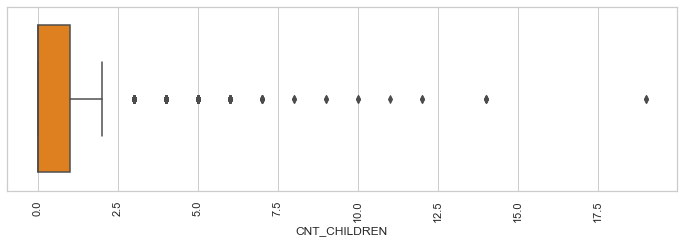

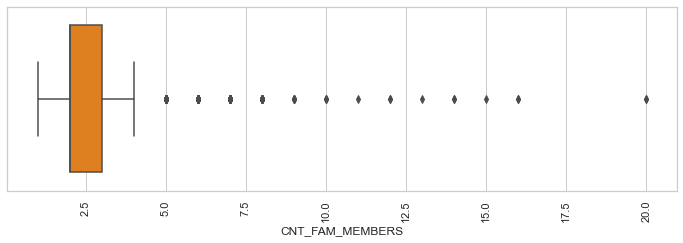

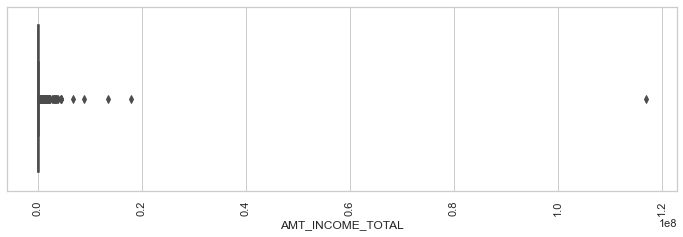

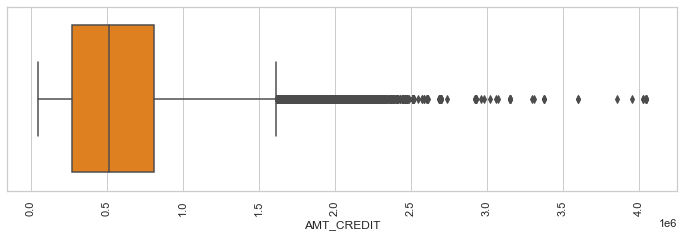

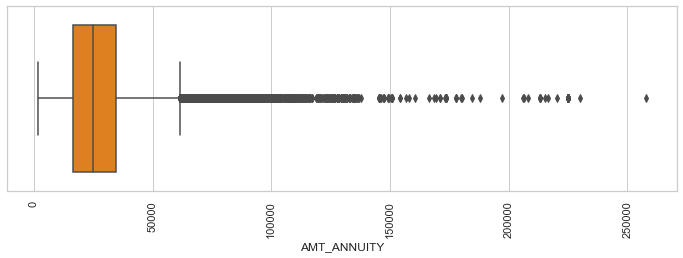

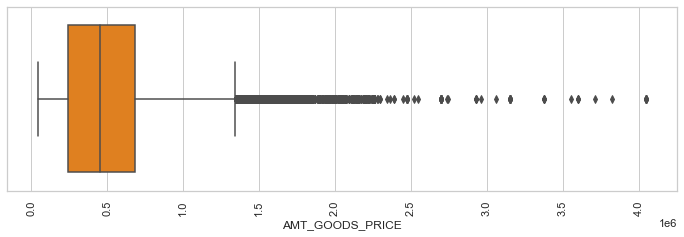

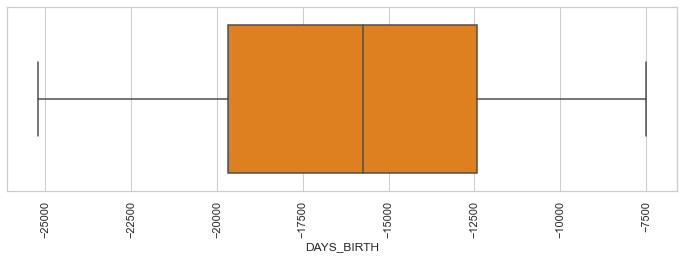

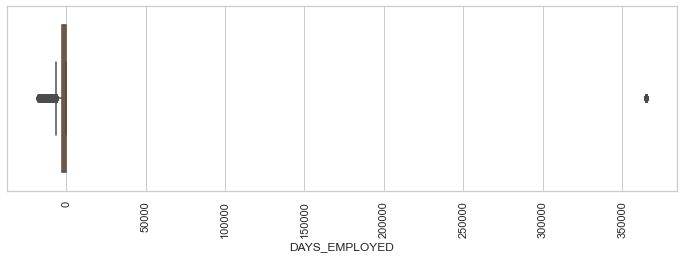

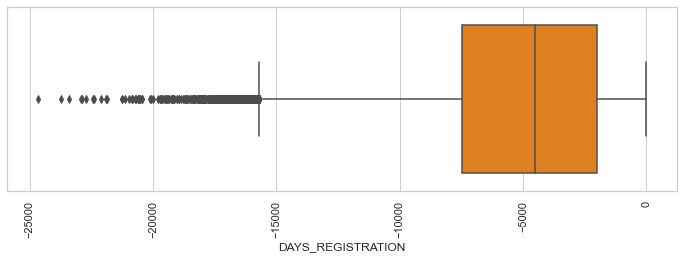

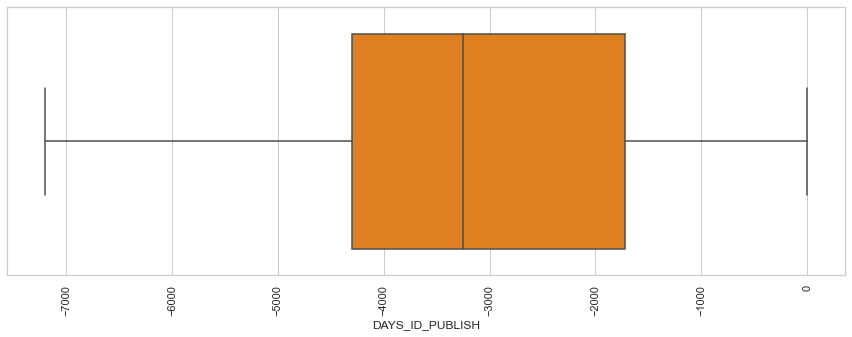

In [42]:
l=['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
c=1
for i in range(len(l)):
    plt.figure(figsize=[12,40])
    plt.subplot(len(l),1,c)
    sns.boxplot(adf2[l[i]],palette="autumn")
    c+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can cap the rows above 99/99.9 quantile accordingly for 'CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED','DAYS_REGISTRATION' and then plot again

Days Employed Data appears to be highly skewed. We need to do something with it

In [43]:
adf2.loc[adf2.DAYS_EMPLOYED==365243].shape

(55374, 72)

In [44]:
adf2.DAYS_EMPLOYED.describe()

count    307506.000000
mean      63816.137688
std      141276.654931
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [45]:
365243/365

1000.6657534246575

A person cannot be employed for 1000 years and as the number of values are so many, we will replace these values as null and leave the values be and carry on with the analysis without imputing the missing values 

In [46]:
adf2.DAYS_EMPLOYED[adf2.DAYS_EMPLOYED==365243]=np.NaN

In [47]:
adf2.DAYS_EMPLOYED.describe()

count    252132.000000
mean      -2384.150548
std        2338.328595
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

Converting the days to years 

In [48]:
days=[i for i in adf2.columns if i.find('DAYS')>-1]
adf2.loc[:,days]=adf2.loc[:,days].apply(lambda x:-x/365)
adf2.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH',
 'DAYS_EMPLOYED':'YEARS_EMPLOYED',
 'DAYS_REGISTRATION':'YEARS_REGISTRATION',
 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace=True)

In [49]:
m=['AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','YEARS_REGISTRATION']

for i in m:
    adf2[i][adf2[i] >= adf2[i].quantile(0.99)]= adf2[i].quantile(0.99)


In [50]:
m=['CNT_CHILDREN','CNT_FAM_MEMBERS']

for i in m:
    adf2[i][adf2[i] >= adf2[i].quantile(0.98)]= adf2[i].quantile(0.98)


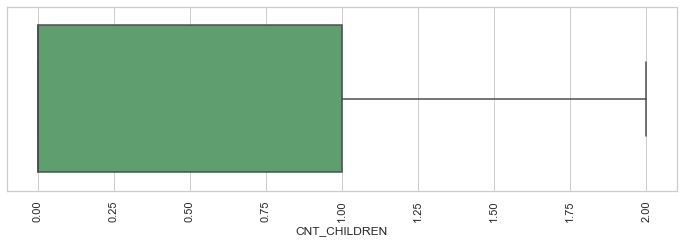

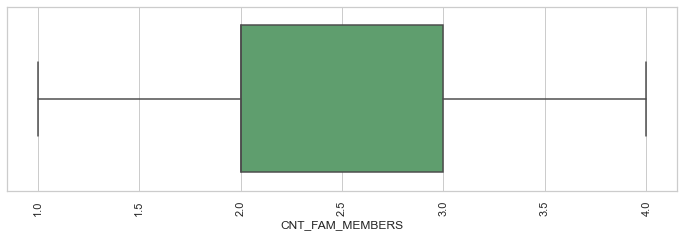

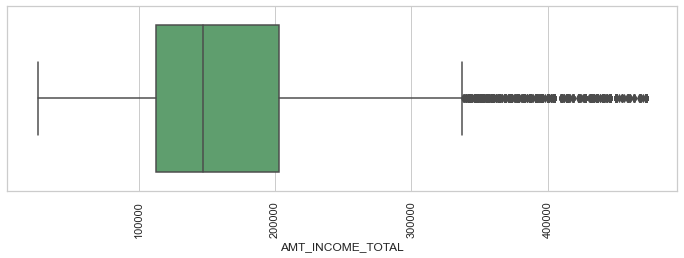

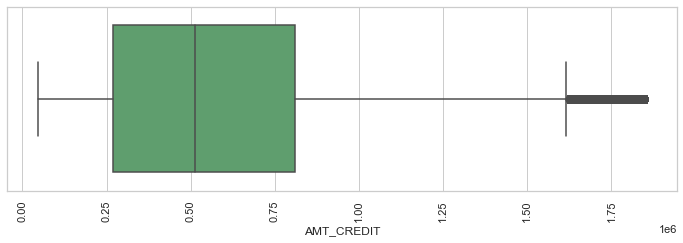

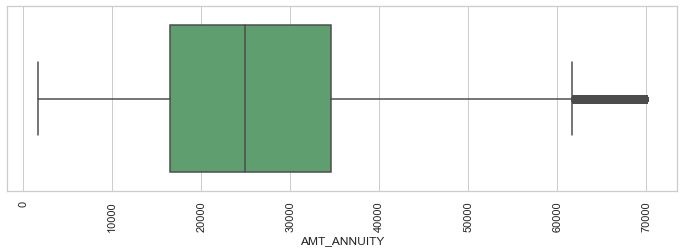

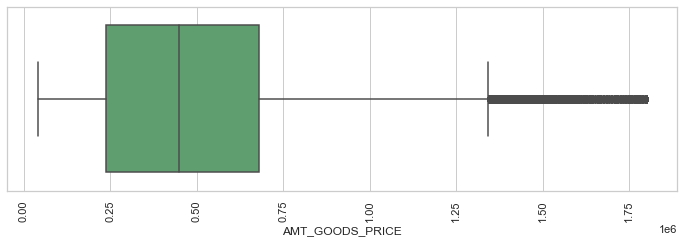

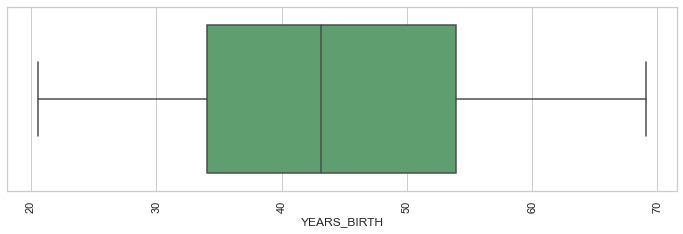

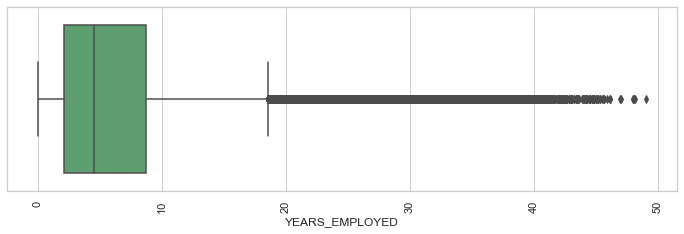

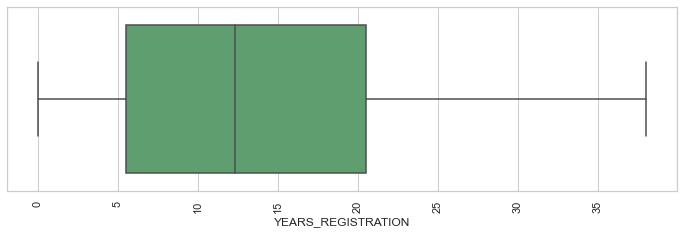

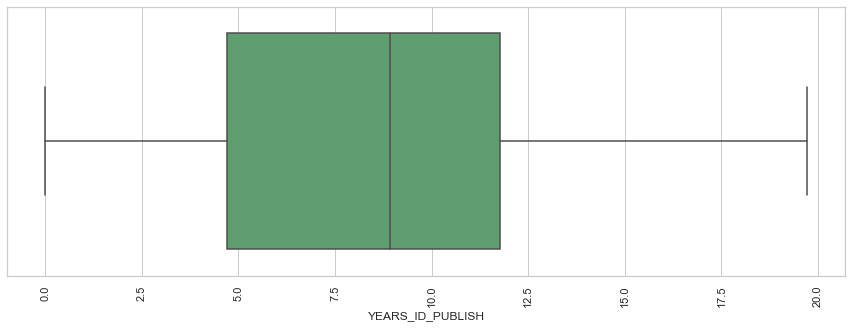

In [51]:
l=['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH']
c=1
for i in range(len(l)):
    plt.figure(figsize=[12,40])
    plt.subplot(len(l),1,c)
    sns.boxplot(adf2[l[i]],color="g")
    c+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

    The data looks much cleaner now. We can begin with the analysis.

Other inferences from the boxplots:-
    
    1. 75% of the people have less than 1 children and less than 3 family members.
    2. 75% of the people have an income less than 2,00,000 and majority of applicants have an income less that 4,00,000 
    3. Majority of the applicants changed there ID b/w 5-10 years and registration b/w 5-20 years
    4. Majority of the applicants are employed for less than 20 years but the employment duration goes upto 50 years
    5. Majority of applicants are in the age group 35-55
    

In [52]:
adf2.shape

(307506, 72)

### Checking balance in data

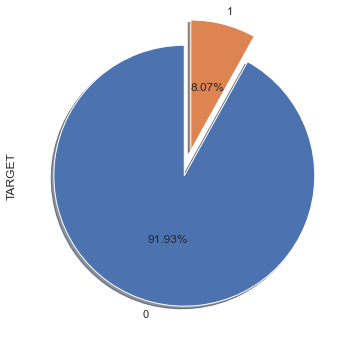

In [53]:
plt.figure(figsize=[6,6])
adf2.TARGET.value_counts(normalize=True).plot(kind = 'pie', explode = [0, 0.2], autopct = '%.2f%%',
                                         startangle = 90,shadow = True, pctdistance = 0.5)
plt.show()

Data appears to be severely imbalanced, we would have to use ratios instead of absolute value as 91% of the people are non defaulters while 9% of the people are defaulters

#### Ratio of imbalance

In [54]:
(adf2.TARGET==0).sum()/(adf2.TARGET==1).sum()

11.386948640483384

### Binning some of the continuous variables

In [55]:
adf2.YEARS_BIRTH.describe()

count    307506.000000
mean         43.937128
std          11.956079
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64

In [56]:
adf2.YEARS_EMPLOYED.describe()

count    252132.000000
mean          6.531919
std           6.406380
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

In [57]:
adf2.loc[:,'INCOME_RANGE']=pd.qcut(adf2.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.25,0.50,0.75,1],
labels=['Low','Medium','High','Very High'])
adf2.loc[:,'CREDIT_RANGE']=pd.qcut(adf2.loc[:,'AMT_CREDIT'],q=[0,0.25,0.50,0.75,1],
labels=['Low','Medium','High','Very High'])
adf2.loc[:,'ANNUITY_RANGE']=pd.qcut(adf2.loc[:,'AMT_ANNUITY'],q=[0,0.25,0.50,0.75,1],
labels=['Low','Medium','High','Very High'])
adf2.loc[:,'GOODS_PRICE_RANGE']=pd.qcut(adf2.loc[:,'AMT_GOODS_PRICE'],q=[0,0.25,0.50,0.75,1],
labels=['Low','Medium','High','Very High'])
adf2.loc[:,'EXT_SCORE_RANGE']=pd.qcut(adf2.loc[:,'EXT_SCORE'],q=[0,0.25,0.50,0.75,1],
labels=['Low','Medium','High','Very High'])
adf2.loc[:,'AGE_RANGE']=pd.qcut(adf2.loc[:,'YEARS_BIRTH'],q=[0,0.25,0.50,0.75,1],
labels=["20-32","33-39","40-48","49-70"])
adf2.loc[:,'EMPLOYMENT_RANGE']=pd.qcut(adf2.loc[:,'YEARS_EMPLOYED'],q=[0,0.25,0.50,0.75,1],
labels=["0-2","2-4","4-8","8 and more"])

Here we have grouped income, credit, annuity, goods price, external score, age and employment experience to categories.

### Checking and correcting the data types of the columns

In [58]:
adf2.select_dtypes("object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [59]:
adf2.select_dtypes("float").columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'YEARS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SCORE'],
      dtype='object')

In [60]:
adf2.select_dtypes("float").head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801    25.920548        1.745205   
1                    0.003541    45.931507        3.254795   
2                    0.010032    52.180822        0.616438   
3                    0.008019    52.068493        8.326027   
4                    0.028663    54.608219        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            9.994521          5.808219              1.0   
1            3.249315          0.797260              2.0   
2           11.671233          6.934247              1.0   
3           26.939726          6.676712              2.0   
4           11.810959          9.473973              1.0   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   YEARS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 3.106849                         0.0   
1                 2.268493                         0.0   
2                 2.232877                         0.0   
3                 1.690411                         0.0   
4                 3.030137                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  EXT_SCORE  
0                         1.0   0.161787  
1                         0.0   0.466757  
2                         0.0   0.642739  
3                         0.0   0.650442  
4                         0.0   0.322738

In [61]:
l=['TARGET']

In [62]:
adf2.loc[:,l]=adf2.loc[:,l].astype('int64')

In [63]:
adf2.TARGET.isnull().sum()

0

In [64]:
adf2.select_dtypes("int64").head()

SK_ID_CURR  TARGET  CNT_CHILDREN  FLAG_MOBIL  FLAG_EMP_PHONE  \
0      100002       1             0           1               1   
1      100003       0             0           1               1   
2      100004       0             0           1               1   
3      100006       0             0           1               1   
4      100007       0             0           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0                0                 1           1           0   
1                0                 1           1           0   
2                1                 1           1           0   
3                0                 1           0           0   
4                0                 1           0           0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  FLAG_DOCUMENT_2  \
0                       0                        0                0   
1                       0                        0                0   
2                       0                        0                0   
3                       0                        0                0   
4                       1                        1                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                1                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2      

In [65]:
adf2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801    25.920548        1.745205   
1                    0.003541    45.931507        3.254795   
2                    0.010032    52.180822        0.616438   
3                    0.008019    52.068493        8.326027   
4                    0.028663    54.608219        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0            9.994521          5.808219           1               1   
1            3.249315          0.797260           1               1   
2           11.671233          6.934247           1               1   
3           26.939726          6.676712           1               1   
4           11.810959          9.473973           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0      Core staff   
2                1                 1           1           0        Laborers   
3                0                 1           0           0        Laborers   
4                0                 1           0           0      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                 

In [66]:
adf.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

Converting the binary variables to categorical variables

In [67]:
binary=['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
adf2.loc[:,binary]=adf2.loc[:,binary].astype("object")

In [68]:
adf2.select_dtypes("object").head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0  House / apartment          1              1               0   
1  House / apartment          1              1               0   
2  House / apartment          1              1               1   
3  House / apartment          1              1               0   
4  House / apartment          1              1               0   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  \
0                1          1          0        Laborers   
1                1          1          0      Core staff   
2                1          1          0        Laborers   
3                1          0          0        Laborers   
4                1          0          0      Core staff   

  WEEKDAY_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
0                  WEDNESDAY                          0   
1                     MONDAY                          0   
2                     MONDAY                          0   
3                  WEDNESDAY                          0   
4                   THURSDAY                          0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      1                       1   

  ORGANIZATION_TYPE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4  \
0          Business               0               1               0   
1            School               0               1               0   
2        Government               0               0               0   
3          Business               0               1               0   
4          Religion               0               0               0   

  FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               1   

  FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12  \
0               0                0                0                0   
1               0                0                0                0   
2               0                0                0                0   
3        

### DATA ANALYSIS

Dividing the datasets on the basis of target variable

In [69]:
adf2.shape

(307506, 79)

In [70]:
t0=adf2[adf2.TARGET==0]
t1=adf2[adf2.TARGET==1]

In [71]:
t0.shape

(282681, 79)

In [72]:
t1.shape

(24825, 79)

### Univariate Data Analysis

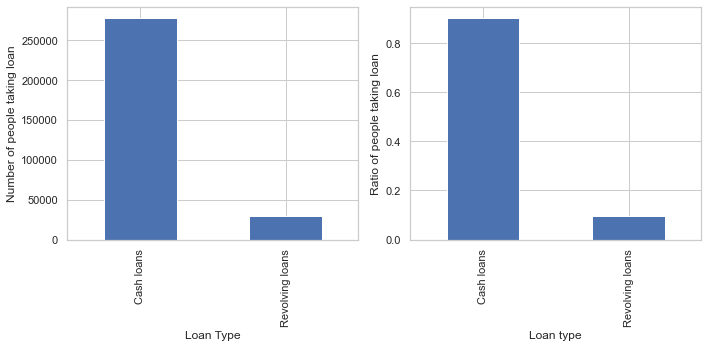

In [73]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
adf2.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.xlabel("Loan Type")
plt.ylabel("Number of people taking loan")
plt.subplot(1,2,2)
adf2.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.xlabel("Loan type")
plt.ylabel("Ratio of people taking loan")
plt.tight_layout()
plt.show()

More than 80% of the applications are for cash loans

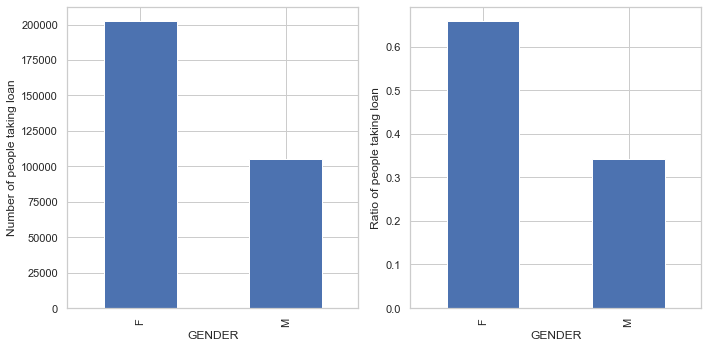

In [74]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
adf2.CODE_GENDER.value_counts().plot.bar()
plt.xlabel("GENDER")
plt.ylabel("Number of people taking loan")
plt.subplot(1,2,2)
adf2.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.xlabel("GENDER")
plt.ylabel("Ratio of people taking loan")
plt.tight_layout()
plt.show()

Number of application for loan is much more for female than male. 60% of the applications are from females and 40% of the applications are from males.

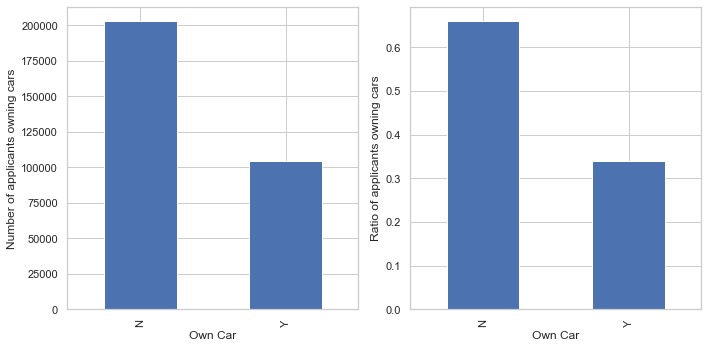

In [75]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
adf2.FLAG_OWN_CAR.value_counts().plot.bar()
plt.xlabel("Own Car")
plt.ylabel("Number of applicants owning cars")
plt.subplot(1,2,2)
adf2.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.xlabel("Own Car")
plt.ylabel("Ratio of applicants owning cars")
plt.tight_layout()
plt.show()

Only about 37% of the people own a car, while 63% for the applicants don't

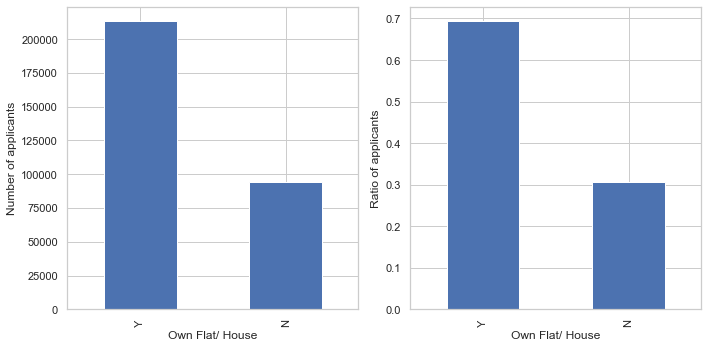

In [76]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
adf2.FLAG_OWN_REALTY.value_counts().plot.bar()
plt.xlabel("Own Flat/ House")
plt.ylabel("Number of applicants")
plt.subplot(1,2,2)
adf2.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.xlabel("Own Flat/ House")
plt.ylabel("Ratio of applicants")
plt.tight_layout()
plt.show()

Only about 32% of the people own a flat/house, while 68% for the applicants don't

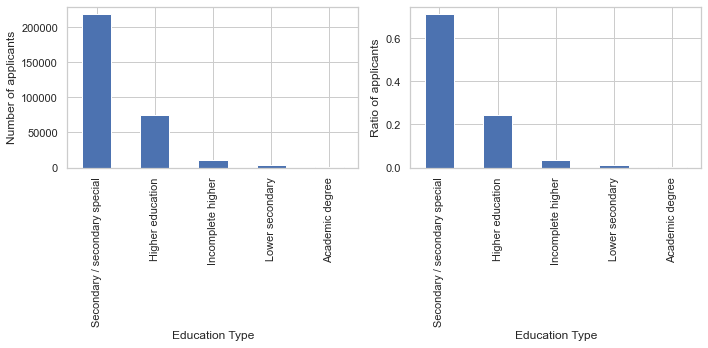

In [77]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
adf2.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.xlabel("Education Type")
plt.ylabel("Number of applicants")
plt.subplot(1,2,2)
adf2.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xlabel("Education Type")
plt.ylabel("Ratio of applicants")
plt.tight_layout()
plt.show()

Education type for 70% of the applicants is Secondory/Secondary special

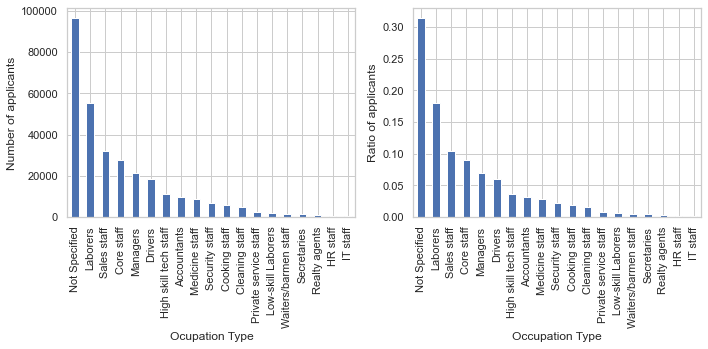

In [78]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
adf2.OCCUPATION_TYPE.value_counts().plot.bar()
plt.xlabel("Ocupation Type")
plt.ylabel("Number of applicants")
plt.subplot(1,2,2)
adf2.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xlabel("Occupation Type")
plt.ylabel("Ratio of applicants")
plt.tight_layout()
plt.show()

Highest number of loans are applied by Laboreres and Sales staff.

### Segmented Univariate Data Analysis

#### Categorical variables

In [79]:
categorical=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_PHONE','OCCUPATION_TYPE',
       'LIVE_REGION_NOT_WORK_REGION','ORGANIZATION_TYPE', 'LIVE_CITY_NOT_WORK_CITY']

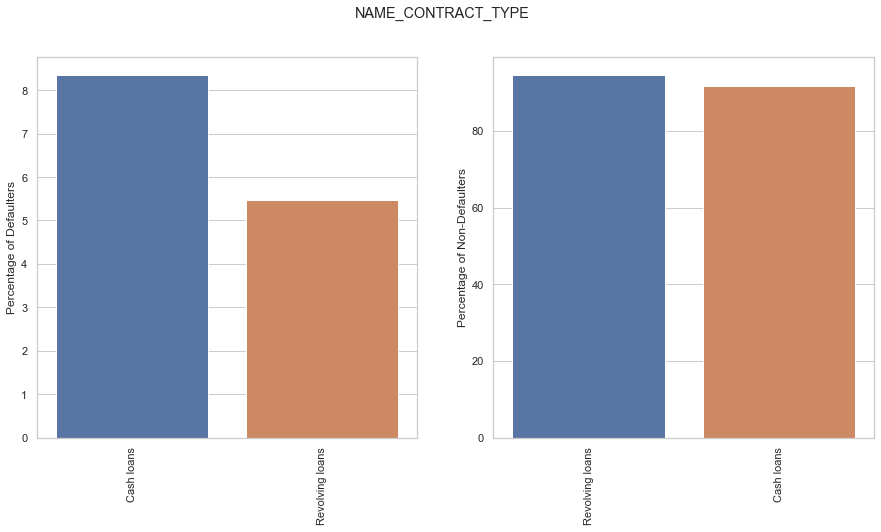

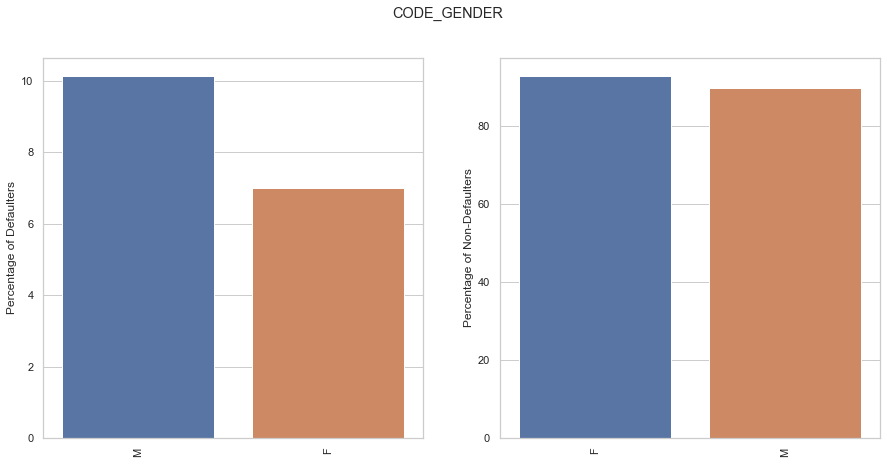

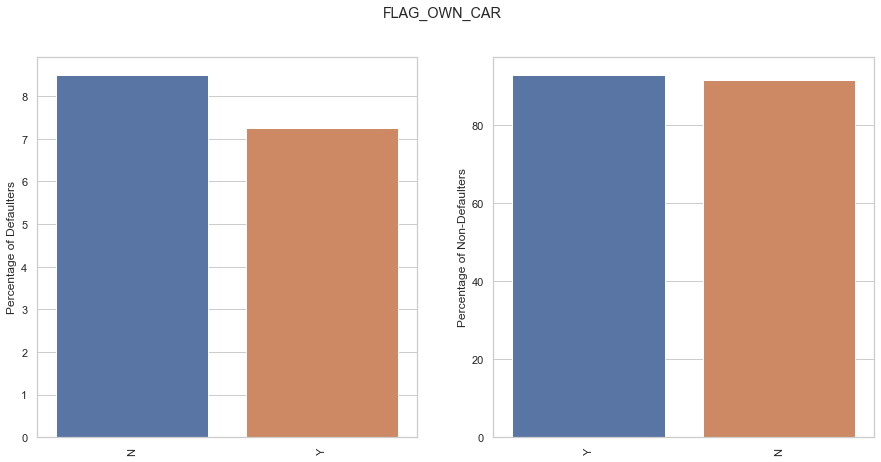

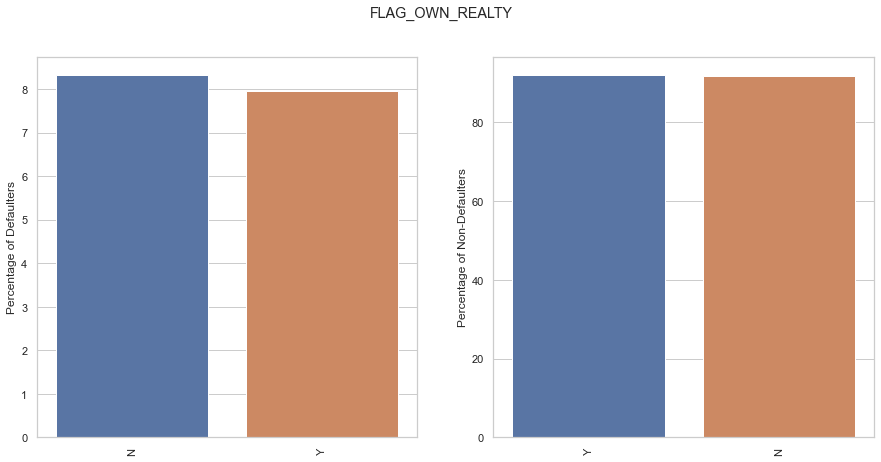

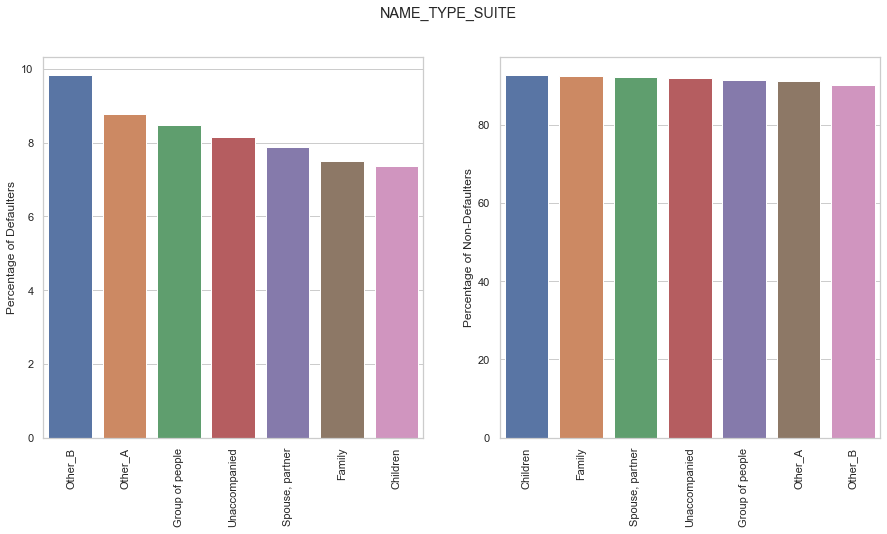

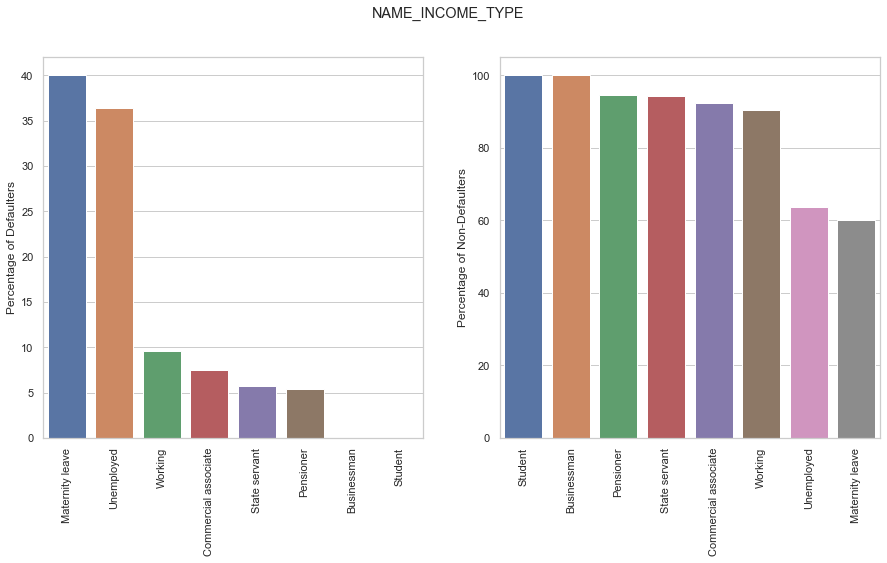

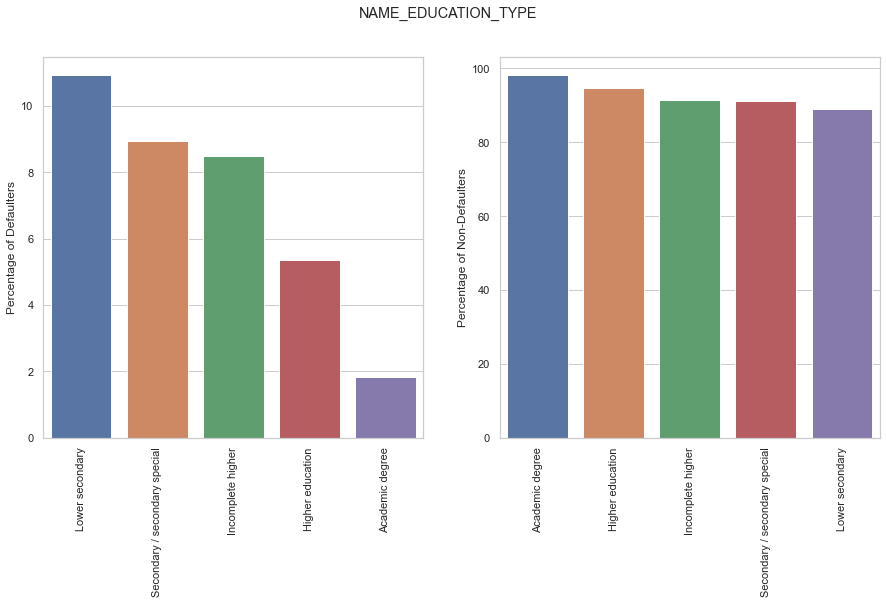

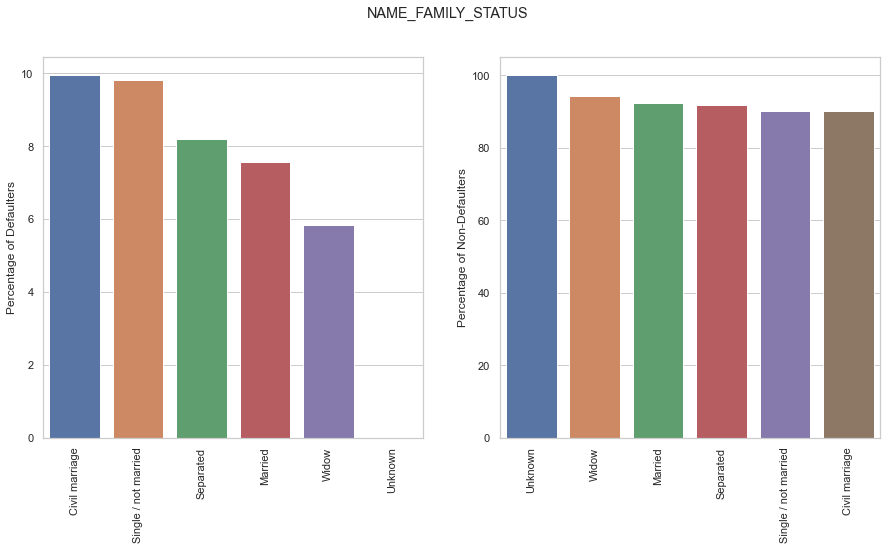

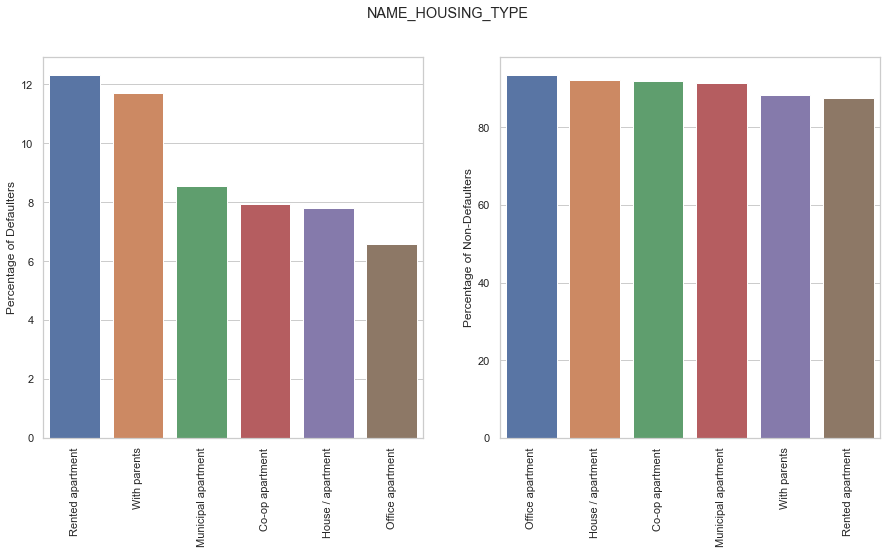

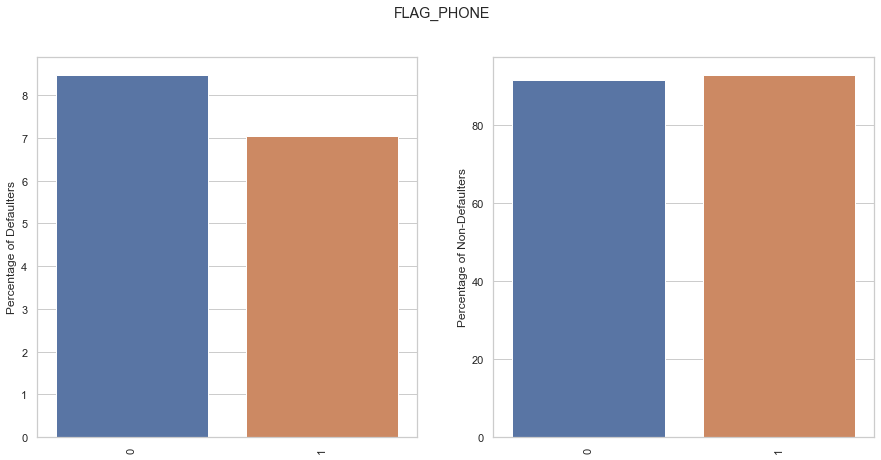

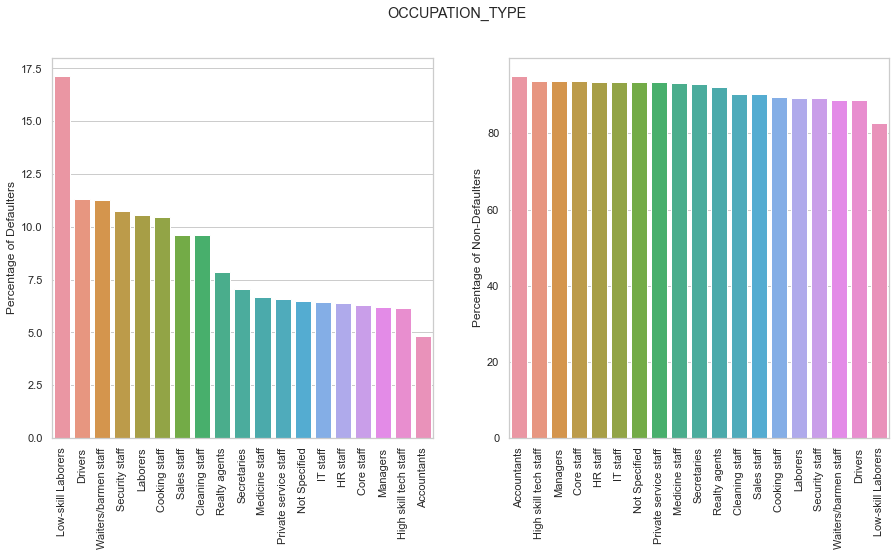

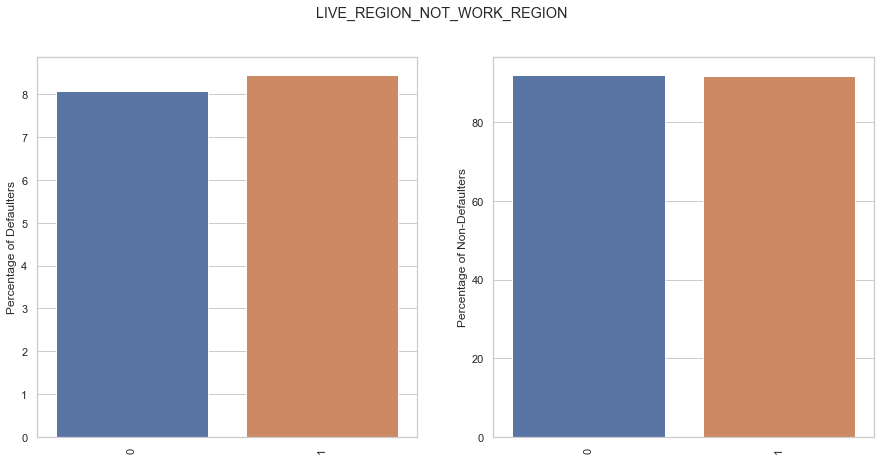

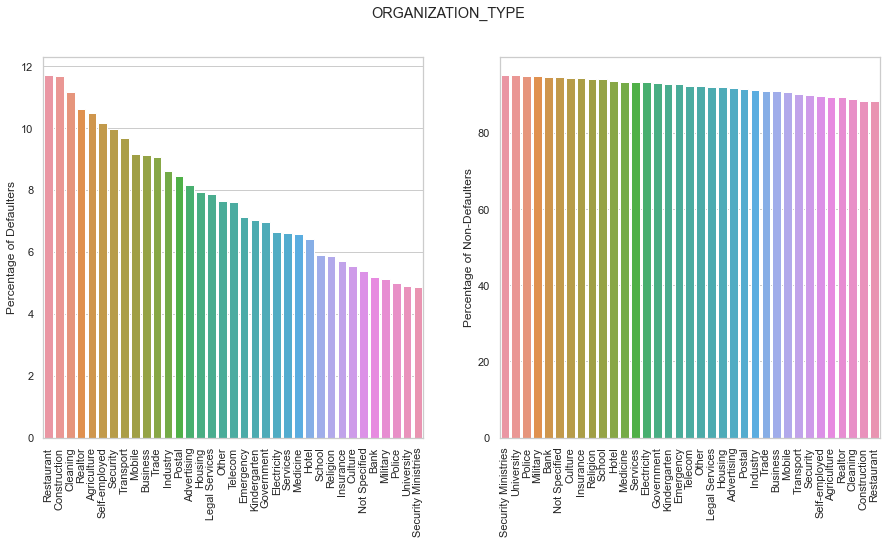

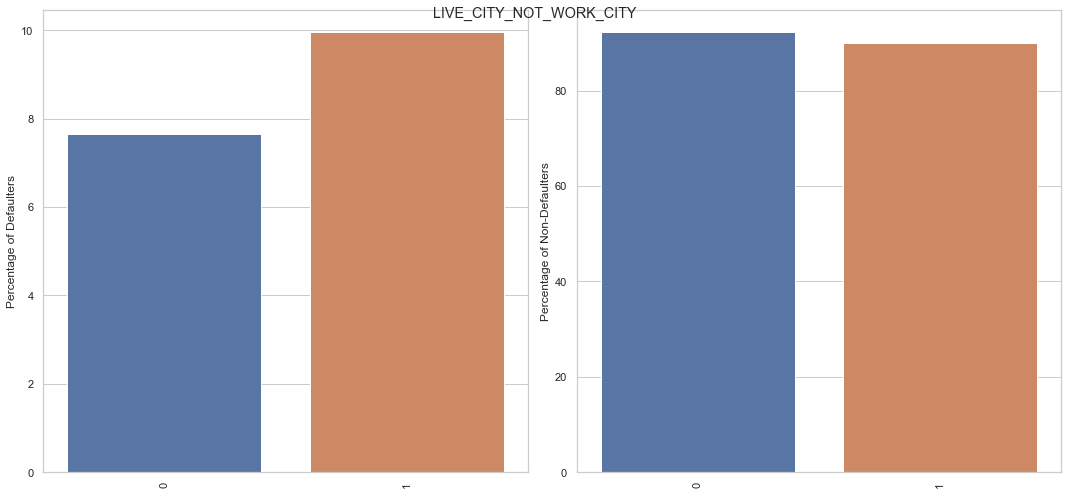

In [80]:
for i in categorical:
    plt.figure(figsize=[15,7])
    plt.subplot(1,2,1)
    b=t1[i].value_counts()/adf2[i].value_counts()*100
    b.sort_values(ascending=False,inplace=True)
    sns.barplot(b.index,b.values)
    plt.ylabel("Percentage of Defaulters")
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    a=t0[i].value_counts()/adf2[i].value_counts()*100
    a.sort_values(ascending=False,inplace=True)
    sns.barplot(a.index,a.values)
    plt.xticks(rotation=90)
    plt.ylabel("Percentage of Non-Defaulters")
    plt.suptitle(i)
plt.tight_layout()
plt.show()

We can draw the following inference from the graphs:-

1. Percentage of defaulters for cash loans (8.5%) are more than revolving loans (5.5%)
2. Even though as we saw above that females are applying more for loans but the default is more for males (10%) than females (6.5%)
3. Even though the difference is not much people owning car have less default rate (8.5%) than who don't own a car. (7.2%).
4. There isn't a significant default rate in the people who own or don't own a flat/ house (About 8% for both)
5. People who were accompanied by OTHER_B category people had more default rate (almost 10%) followed by OTHER_A category people (almost 8%)
6. The default rate for females on maternity leave is as high as 40% followed by unemployed people (almost 30%) and least for students and business man (almost 0%)
7. The default rate is highest for people with lower secondary degree (10.5%) and lowest for people with academic degree (2%)
8. Default rate is more for client's whose contact address does not match work address (10%) as less for others (less than 8%)
9. Default rate is significantly more for people working in organization type Restaurant and Construction (almost 12%) and least for Police, University and Security Ministers (4.5%)
10. Highest default rate is for low skilled labourers(17.5%), least is for accountants (4.5%),high skilled tech staff (5.5%) and managers.
11. The people who didn’t provide their number have a default rate of 8.5%, while those who did have a default rate of 7%.

### Flag documents

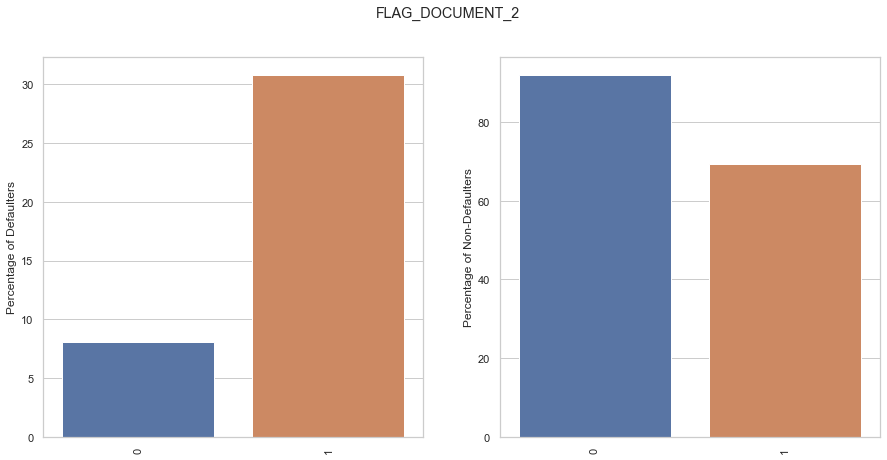

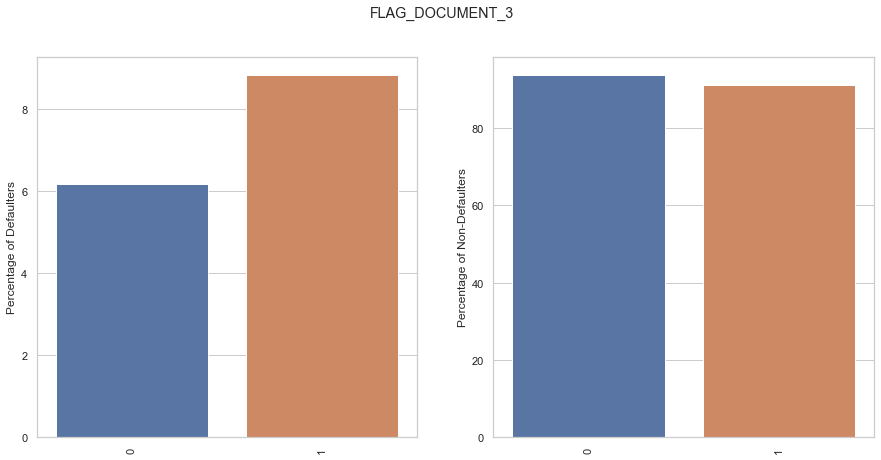

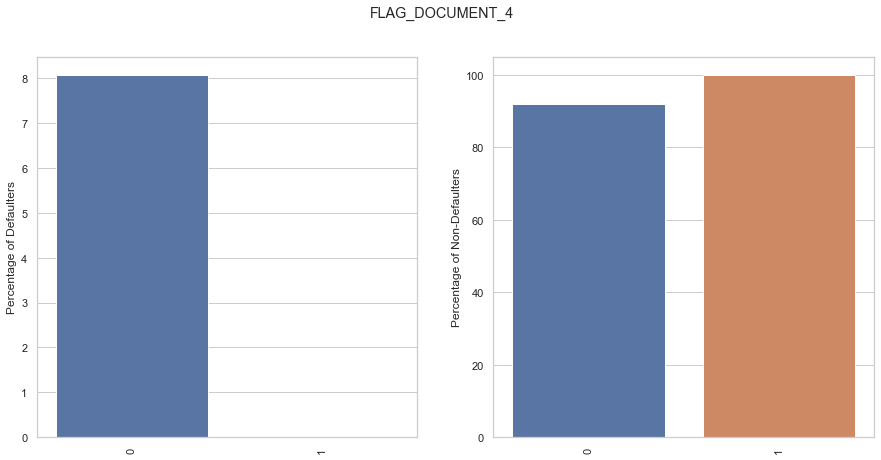

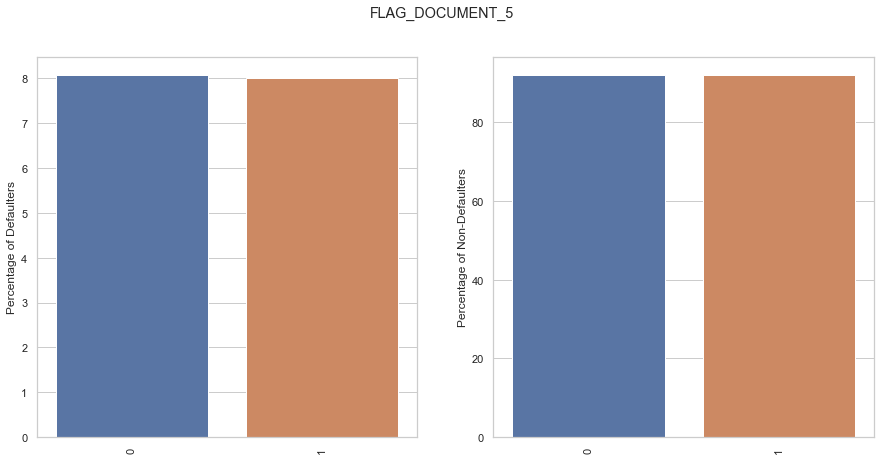

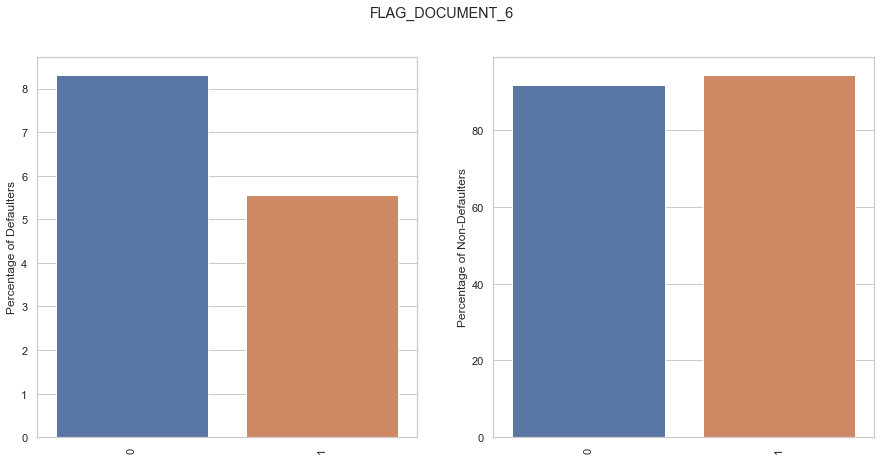

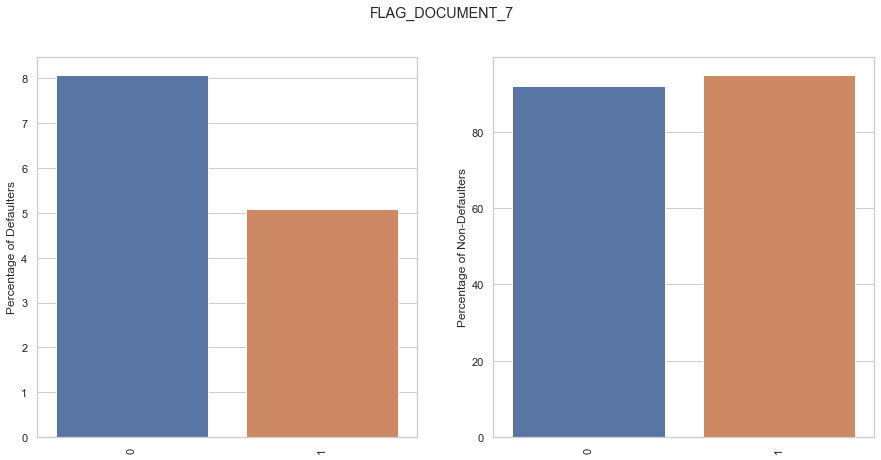

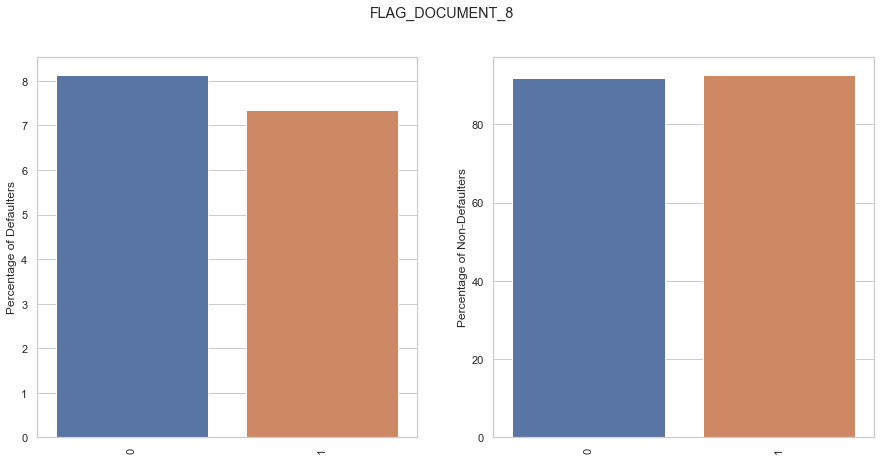

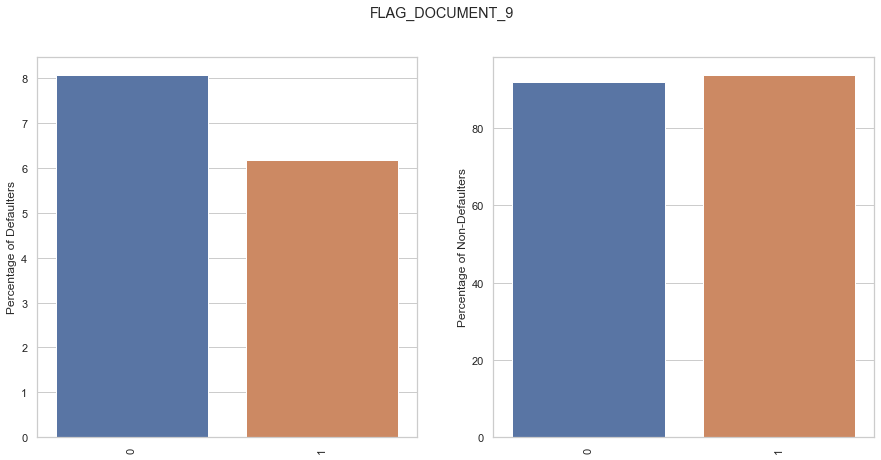

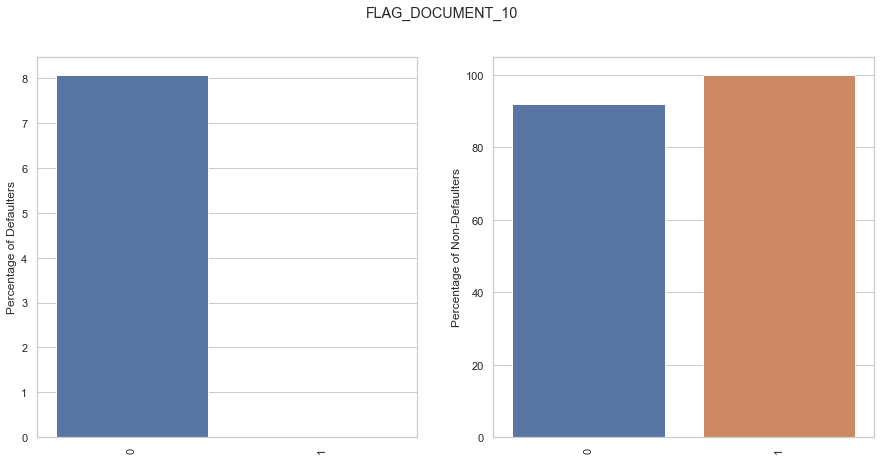

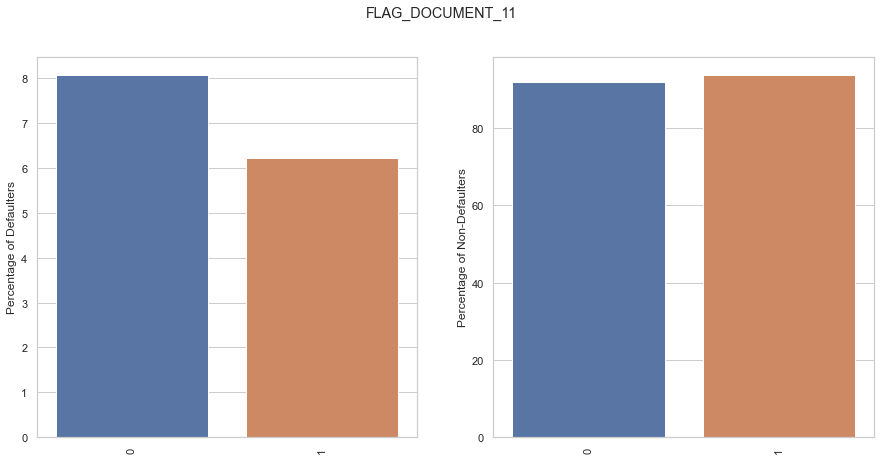

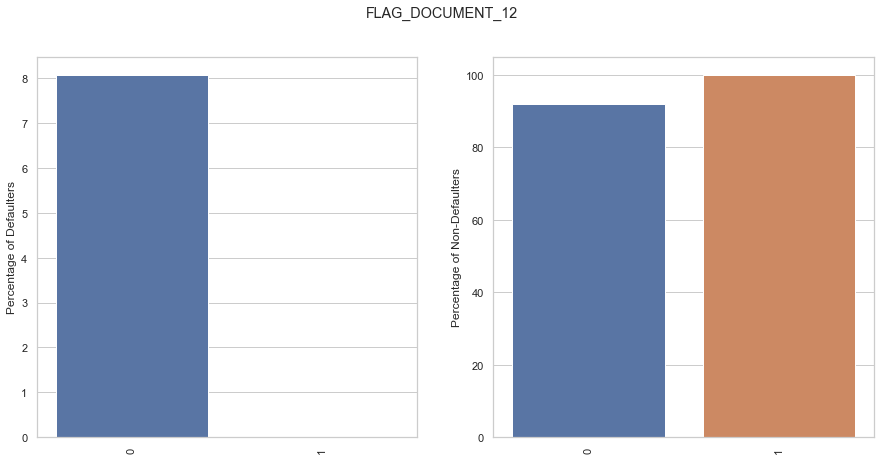

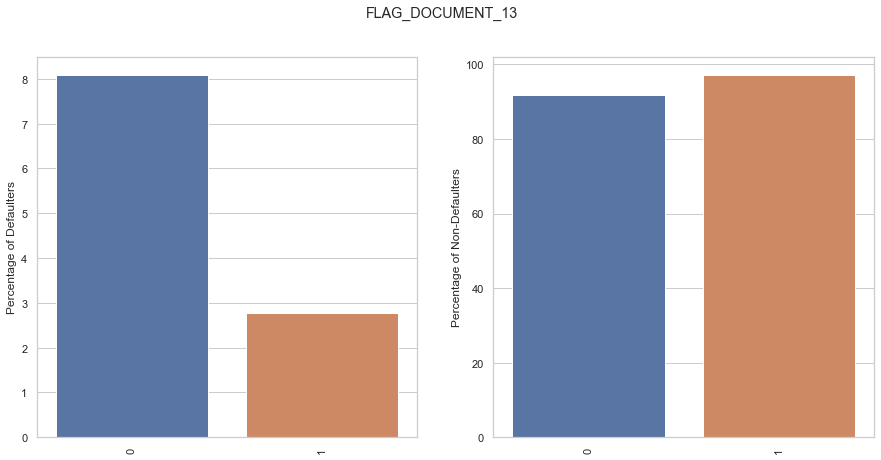

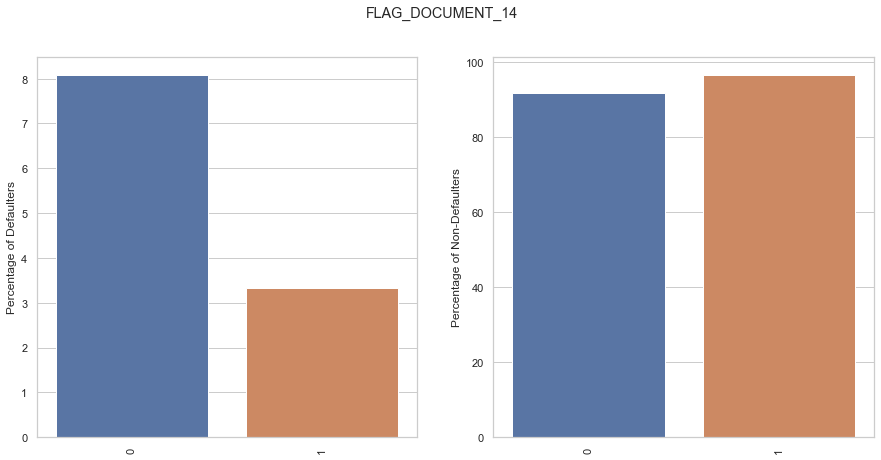

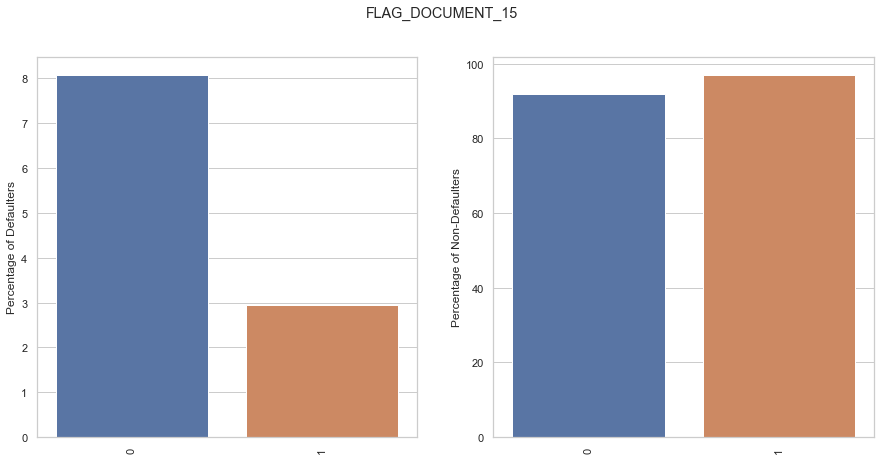

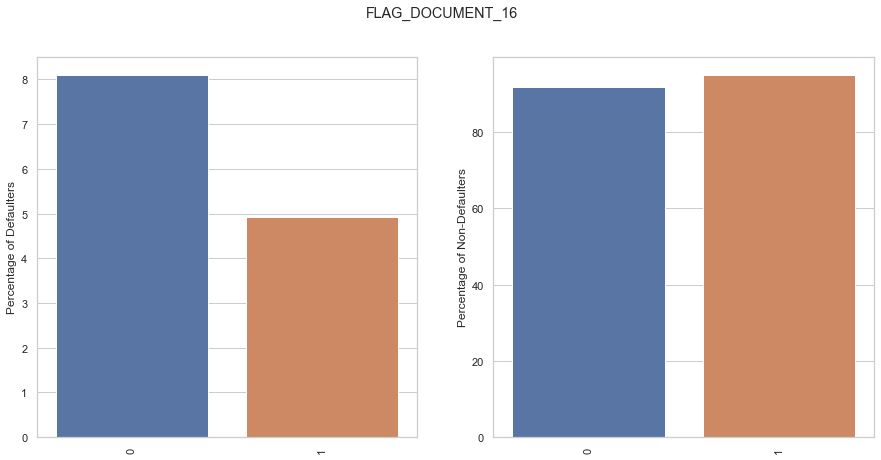

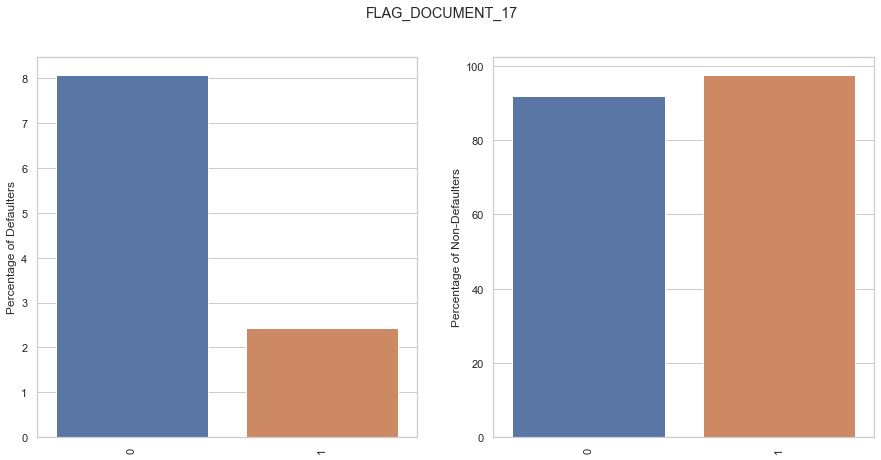

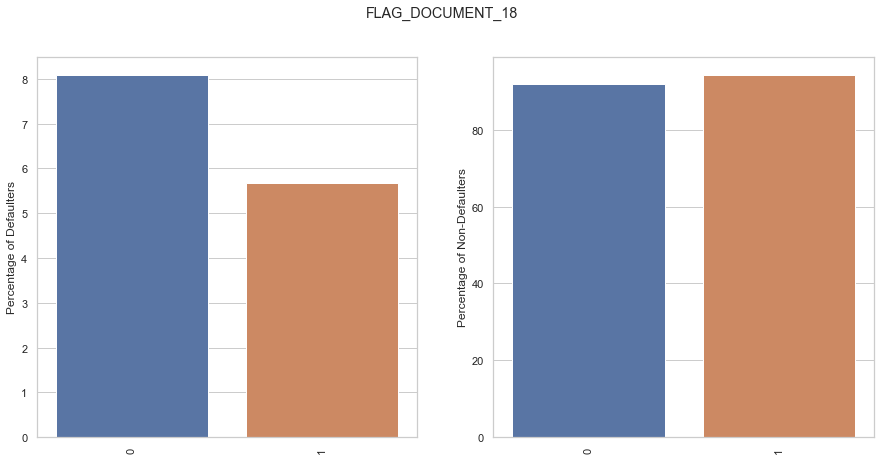

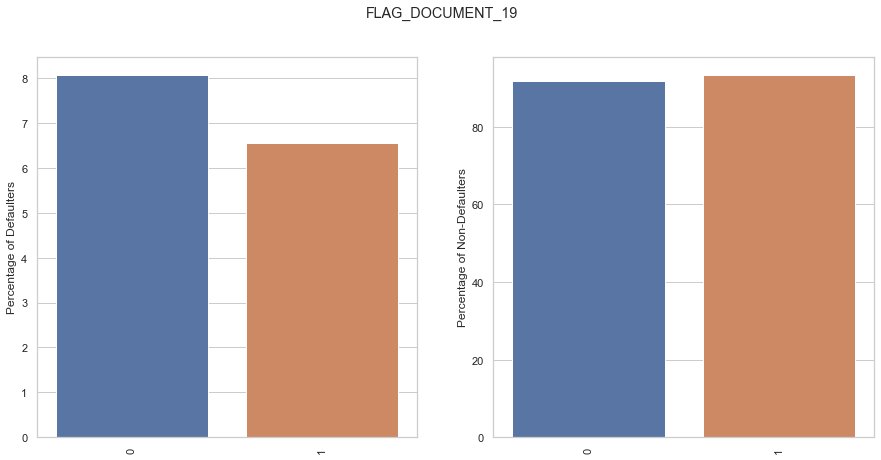

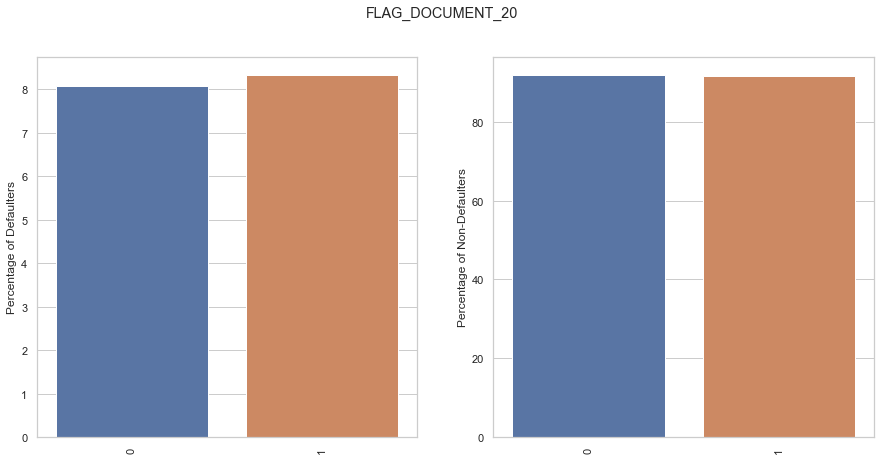

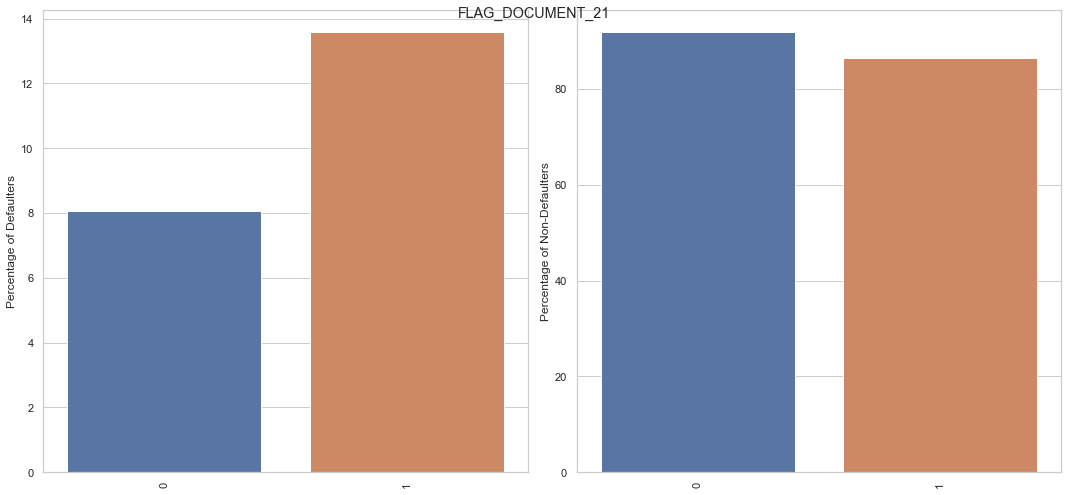

In [81]:
flag=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
for i in flag:
    plt.figure(figsize=[15,7])
    plt.subplot(1,2,1)
    b=t1[i].value_counts()/adf2[i].value_counts()*100
    b.sort_values(ascending=False,inplace=True)
    sns.barplot(b.index,b.values)
    plt.ylabel("Percentage of Defaulters")
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    a=t0[i].value_counts()/adf2[i].value_counts()*100
    a.sort_values(ascending=False,inplace=True)
    sns.barplot(a.index,a.values)
    plt.xticks(rotation=90)
    plt.ylabel("Percentage of Non-Defaulters")
    plt.suptitle(i)
    plt.suptitle(i+"\n\n")
plt.tight_layout()
plt.show()


We can draw the following inferences from the graphs:-

Default rate is comparatively high for the applicants who did not provide documents 4,6,7,9,10,11,12,13,14,15,16,17.


#### Binned Continuous Variables

In [82]:
rg=[i for i in adf2.columns if i.find('RANGE')>0]
adf2[rg].describe()

INCOME_RANGE CREDIT_RANGE ANNUITY_RANGE GOODS_PRICE_RANGE  \
count        307506       307506        307506            307506   
unique            4            4             4                 4   
top             Low          Low          High               Low   
freq         100578        78420         76960             79875   

       EXT_SCORE_RANGE AGE_RANGE EMPLOYMENT_RANGE  
count           307506    307506           252132  
unique               4         4                4  
top          Very High     40-48              2-4  
freq             76877     76887            63067

<Figure size 1080x504 with 0 Axes>

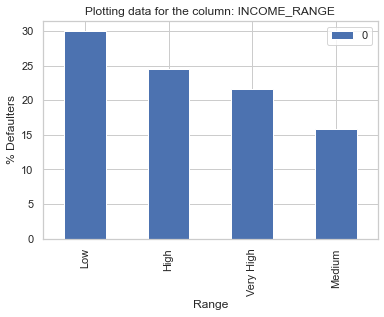

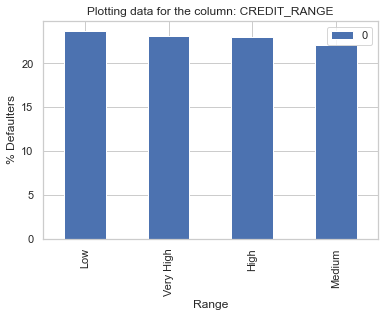

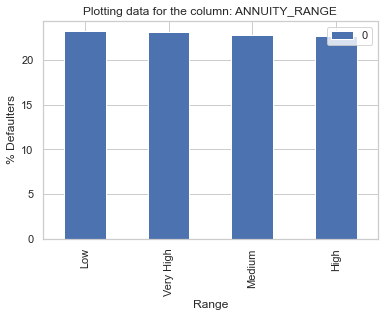

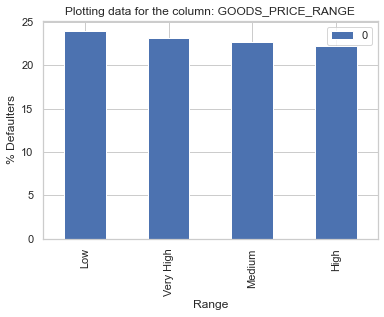

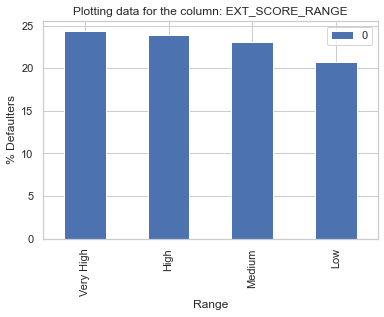

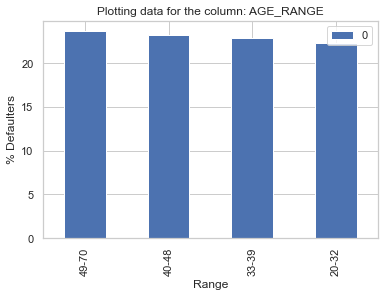

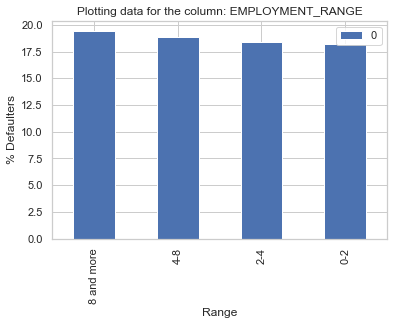

In [83]:
plt.figure(figsize=[15,7])
for i in rg:
    d=pd.DataFrame()
    d["0"]=((t0[i].value_counts())/len(adf2))*100
    
    d.plot.bar()
    plt.title("Plotting data for the column: "+i)
    plt.xlabel("Range")
    plt.ylabel("% Defaulters")
plt.show()

We can draw the following inferences from the graphs:-
    1. The default rate is expectedly high for people in low range income (almost 30%) but surprisingly, people with medium ranged income have lower default rate (15%) that high and very high income category.
    2. For other columns, there isn't much of a difference in the default rate.

#### Continuous variables

In [84]:
adf2.select_dtypes("float").columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'YEARS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SCORE'],
      dtype='object')

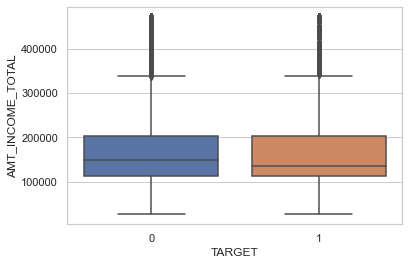

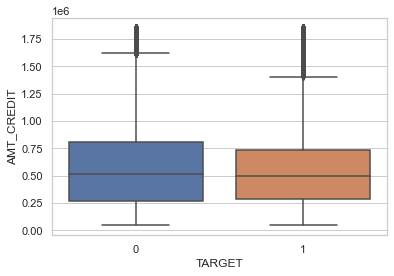

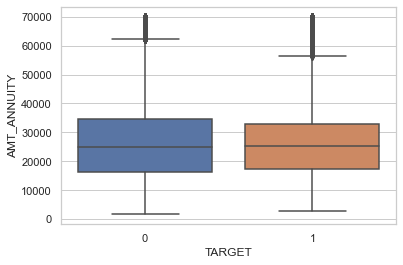

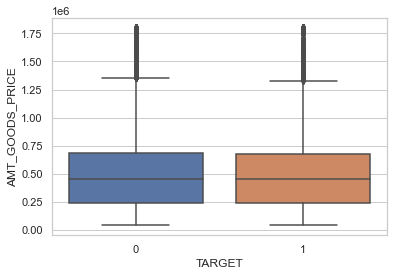

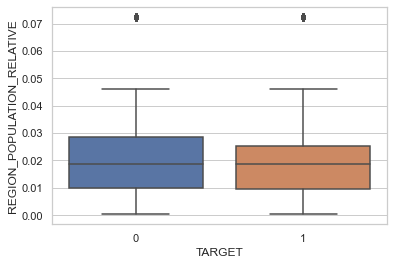

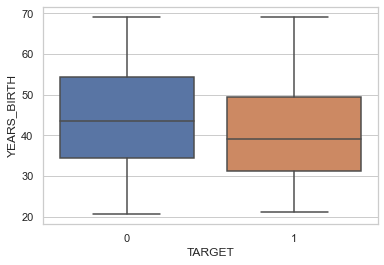

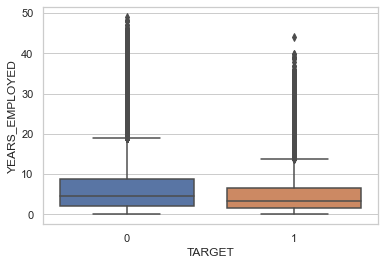

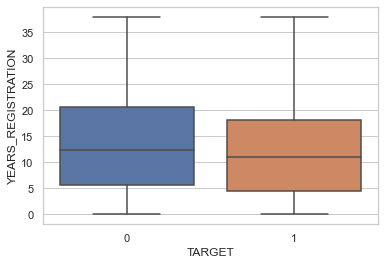

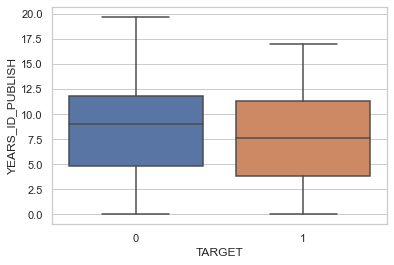

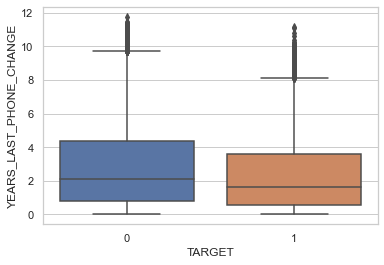

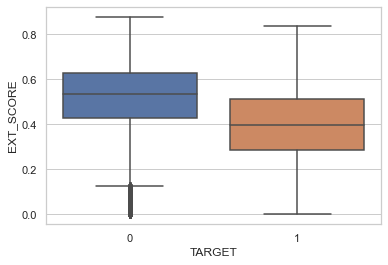

<Figure size 432x288 with 0 Axes>

In [85]:
float=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE',
       'EXT_SCORE']
for i in float:
    sns.boxplot(y=adf2[i],x=adf2.TARGET)
    plt.show()
plt.show()
plt.tight_layout()



Observations:
1. There is not much difference in the distribution for variables except for the below columns.
2. For AMT_ANNUITY, AMT_CREDIT there is a slight difference in the distribution with defaulters having less credit and annuity.
3. The defaulters appears to have a low external normalized score.
4. There defaulters appears to have slightly less age than the non defaulters.
5. The defaulters appear to have slightly less employment experience that the non-defaulters.

#### For Integer Variables

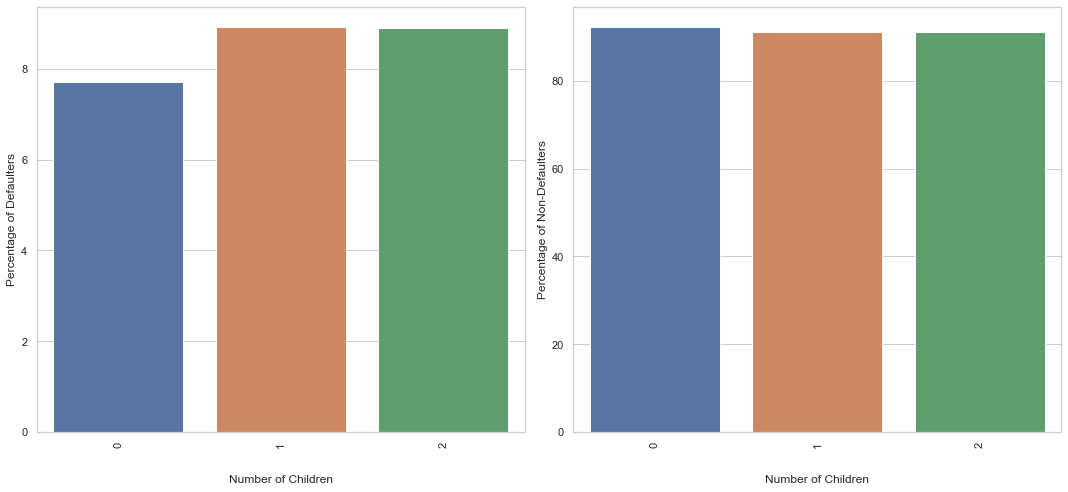

In [86]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
b=t1.CNT_CHILDREN.value_counts()/adf2.CNT_CHILDREN.value_counts()*100
b.sort_values(ascending=False,inplace=True)
sns.barplot(b.index,b.values)
plt.ylabel("Percentage of Defaulters")
plt.xlabel("\n\nNumber of Children")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
a=t0.CNT_CHILDREN.value_counts()/adf2.CNT_CHILDREN.value_counts()*100
a.sort_values(ascending=False,inplace=True)
sns.barplot(a.index,a.values)
plt.xticks(rotation=90)
plt.xlabel("\n\nNumber of Children")
plt.ylabel("Percentage of Non-Defaulters")
plt.tight_layout()
plt.show()

From this bar graph we can see that percentage of defaulters are more for the number of children 1 and 2 while 
for number of children 0,1,2 the percentage of non defaulters are almost same.

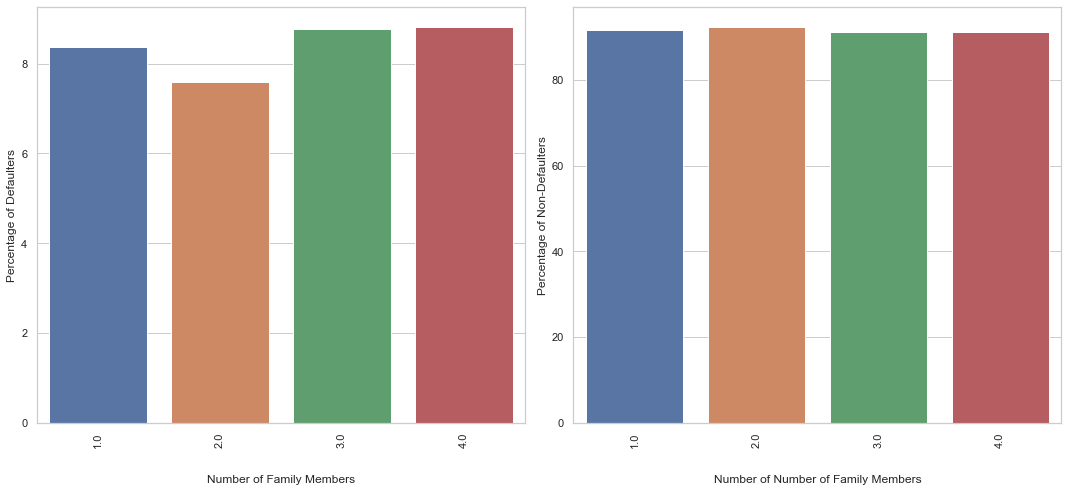

In [87]:
integer=['CNT_FAM_MEMBERS']
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
b=t1.CNT_FAM_MEMBERS.value_counts()/adf2.CNT_FAM_MEMBERS.value_counts()*100
b.sort_values(ascending=False,inplace=True)
sns.barplot(b.index,b.values)
plt.ylabel("Percentage of Defaulters")
plt.xlabel("\n\nNumber of Family Members")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
a=t0.CNT_FAM_MEMBERS.value_counts()/adf2.CNT_FAM_MEMBERS.value_counts()*100
a.sort_values(ascending=False,inplace=True)
sns.barplot(a.index,a.values)
plt.xticks(rotation=90)
plt.xlabel("\n\nNumber of Number of Family Members")
plt.ylabel("Percentage of Non-Defaulters")
plt.tight_layout()
plt.show()

From the above graph we can see that percentage of defaulters are more for the number of family members 3,4.

## Bivariate Analysis 

### Continuous variables

In [88]:
floats=list(adf2.select_dtypes("float").columns.values)
ints=list(adf2.select_dtypes("int64").columns.values)
numerical=float+ints

In [89]:
pair=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
 'YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE','EXT_SCORE']

WE PLOTTED A PIARPLOT FOR THE PAIR VARIABLES, BUT AS IT TAKES A LOT OF TIME TO RUN SUCH PLOT, WE ARE TAKING THE CODE OUT AND JUST PASTING THE PLOT HERE

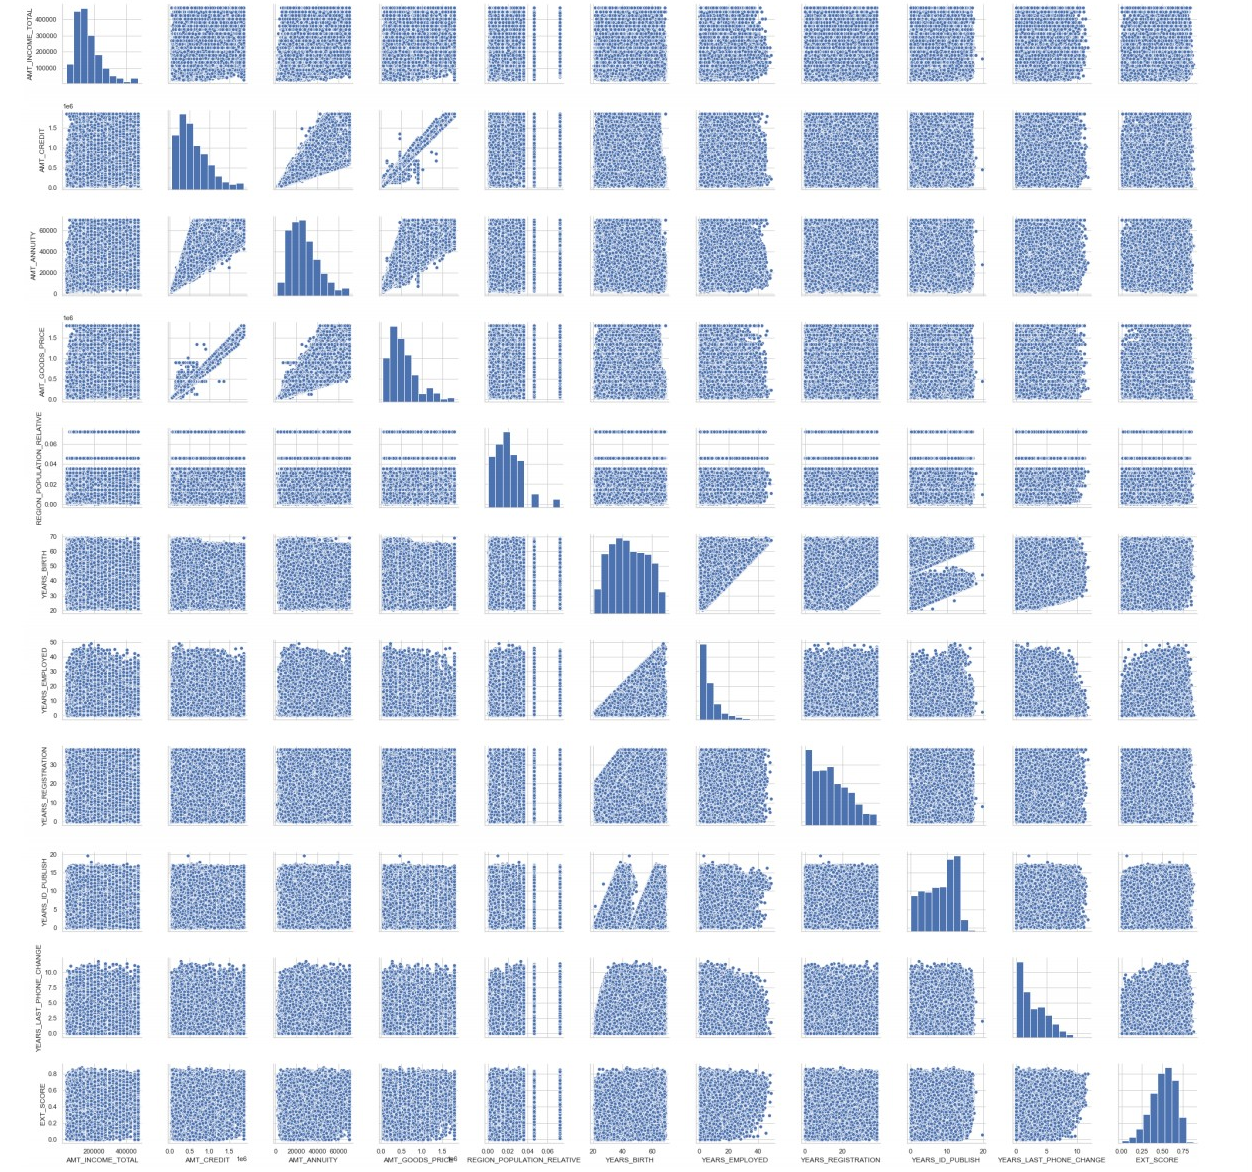

We can see some kind of relationship between years employed and age which is obvious

As we can see there appears to be a relationship among the amt variables,lets plot them for the target variable.

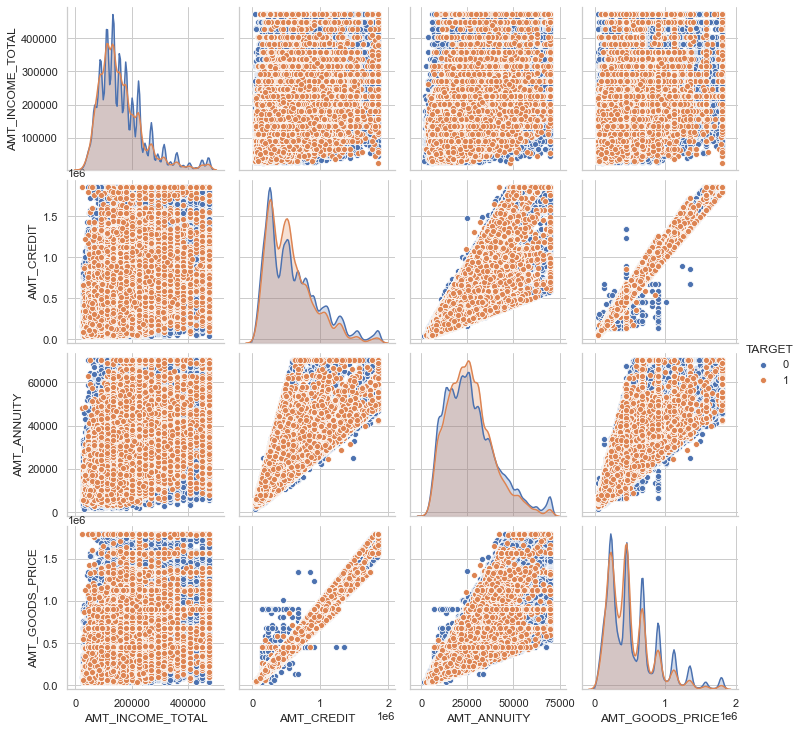

In [90]:
amt=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']
sns.pairplot(adf2.loc[:,amt],'TARGET')
plt.show()

There  appears a to be a high correlation between amt credit and amt goods price. We can also see a realtionship between amt 
annuity and amt credit, and amt annuity and amt goods price.
Amt income does not appears to be related to the other variables.
The distribution of all four varibles appears to be the same for the defaulters and non defaulters but the correlation 
appears to be more between the variables for defaulters.


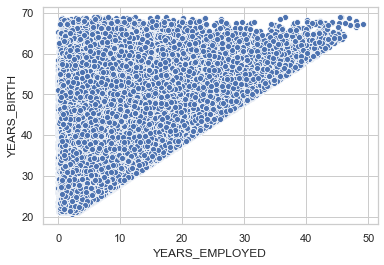

In [91]:
sns.scatterplot(x=adf2.YEARS_EMPLOYED,y=adf2.YEARS_BIRTH)

Correlation between the variables and with the target variable

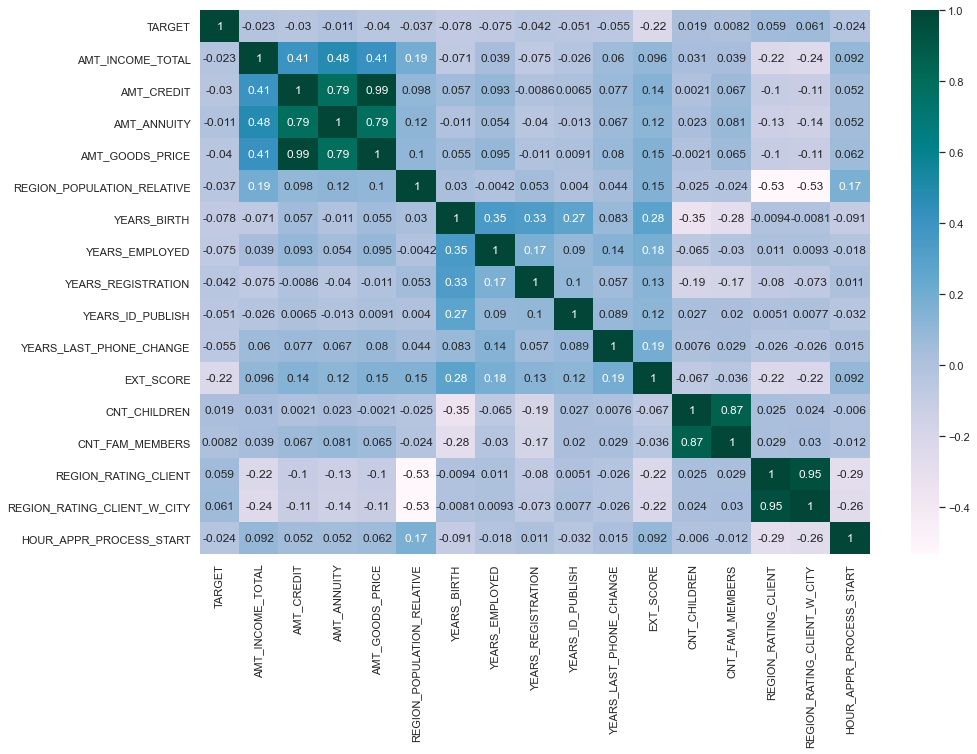

In [92]:
cor=['TARGET','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 
'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE', 'EXT_SCORE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START']
plt.figure(figsize=[15,10])
sns.heatmap(adf2.loc[:,cor].corr(),cmap="PuBuGn",annot=True)
plt.show()


The correlation coefficients between all the numerical variables are visible in the heatmap. Next we would find which vari
ables are correlated to the target variable.

Correlation with respect to the target variable

In [93]:
correlation=adf2.loc[:,cor].corr()
correlation["TARGET"].apply(lambda x: abs(x)).sort_values(ascending=False)


TARGET                         1.000000
EXT_SCORE                      0.221991
YEARS_BIRTH                    0.078244
YEARS_EMPLOYED                 0.074958
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
YEARS_LAST_PHONE_CHANGE        0.055219
YEARS_ID_PUBLISH               0.051459
YEARS_REGISTRATION             0.041902
AMT_GOODS_PRICE                0.039559
REGION_POPULATION_RELATIVE     0.037226
AMT_CREDIT                     0.030024
HOUR_APPR_PROCESS_START        0.024163
AMT_INCOME_TOTAL               0.023292
CNT_CHILDREN                   0.018595
AMT_ANNUITY                    0.010997
CNT_FAM_MEMBERS                0.008229
Name: TARGET, dtype: float64

It appears from the correlation with  the target variable that only EXT_SCORE is somewhat correlated to it. The results aren't very reliable because correlation generally doesn't work for numerical and binary variable. We can contruct anova for such cases.

In [94]:
for i in cor[1:]:
    model = ols('{} ~ TARGET'.format(i), data=adf2).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print("\n Anova table for column :"+i+"\n")
    print(anova_table)


 Anova table for column :AMT_INCOME_TOTAL

                sum_sq        df           F        PR(>F)
TARGET    1.150992e+12       1.0  166.909656  3.581906e-38
Residual  2.120516e+15  307504.0         NaN           NaN

 Anova table for column :AMT_CREDIT

                sum_sq        df           F        PR(>F)
TARGET    4.249139e+13       1.0  277.454518  2.868596e-62
Residual  4.709339e+16  307504.0         NaN           NaN

 Anova table for column :AMT_ANNUITY

                sum_sq        df          F        PR(>F)
TARGET    6.951367e+09       1.0  37.194819  1.070241e-09
Residual  5.746965e+13  307504.0        NaN           NaN

 Anova table for column :AMT_GOODS_PRICE

                sum_sq        df           F         PR(>F)
TARGET    6.297985e+13       1.0  481.964259  9.651575e-107
Residual  4.018256e+16  307504.0         NaN            NaN

 Anova table for column :REGION_POPULATION_RELATIVE

             sum_sq        df          F        PR(>F)
TARGET     0.081520

We have constructed all the anovas, now let's see which of these variables there comes out to be statistically significant difference for the Defaulters and Non-Defaulted clients by plotting the logarithm of p values.

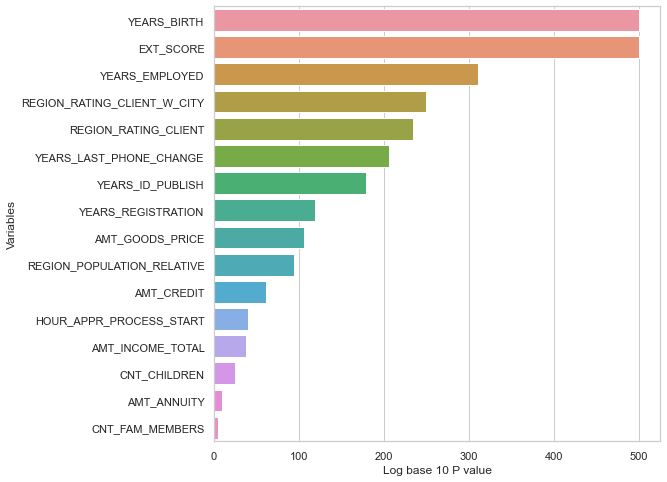

In [95]:
significant_variables=[]
for i in cor[1:]:
    model = ols('{} ~ TARGET'.format(i), data=adf2).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p=anova_table['PR(>F)'][0]
    if p<0.01 and p!=0:
        significant_variables.append((i,abs(math.log10((p)))))
    if p==0:
        significant_variables.append((i,500))

plot=pd.DataFrame(significant_variables,columns=('VARIABLE','P VALUE')).sort_values(by='P VALUE',ascending=False)
plt.figure(figsize=[8,8])
sns.barplot(x='P VALUE', y='VARIABLE', data=plot)
plt.xlabel("Log base 10 P value")
plt.ylabel("Variables")
plt.show()

The above graph shows the variables for which the target variable has significant different. (Highest significance being Age, EXT_Score.)

### Top 10 correlations for Non Defaulters

In [96]:
numerical.remove("SK_ID_CURR")

In [97]:
Corr_Non_Defaulters=t0.loc[:,numerical].corr()
Corr_Non_Defaulters.unstack().apply(lambda x:abs(x)).sort_values(ascending=False).drop_duplicates()[
    Corr_Non_Defaulters.unstack()!=1][:10]

AMT_GOODS_PRICE              AMT_CREDIT                     0.986492
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950148
AMT_GOODS_PRICE              AMT_ANNUITY                    0.792643
AMT_CREDIT                   AMT_ANNUITY                    0.789822
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE     0.539010
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY    0.537307
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.488402
AMT_GOODS_PRICE              AMT_INCOME_TOTAL               0.417209
AMT_INCOME_TOTAL             AMT_CREDIT                     0.410461
YEARS_BIRTH                  YEARS_EMPLOYED                 0.352647
dtype: float64

### Top 10 correlations for Defaulters

In [98]:
Corr_Defaulters=t1.loc[:,numerical].corr()
Corr_Defaulters.unstack().apply(lambda x:abs(x)).sort_values(ascending=False).drop_duplicates()[
    Corr_Non_Defaulters.unstack()!=1][:10]

AMT_GOODS_PRICE             AMT_CREDIT                     0.982110
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956637
AMT_ANNUITY                 AMT_CREDIT                     0.758001
AMT_GOODS_PRICE             AMT_ANNUITY                    0.757306
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY    0.446977
REGION_RATING_CLIENT        REGION_POPULATION_RELATIVE     0.443236
AMT_INCOME_TOTAL            AMT_ANNUITY                    0.427960
                            AMT_GOODS_PRICE                0.352716
AMT_CREDIT                  AMT_INCOME_TOTAL               0.350124
YEARS_EMPLOYED              YEARS_BIRTH                    0.307018
dtype: float64

### Categorical Variable

For finding relationship between categorical variables and the target variable, we would used chi square test of independence

In [99]:
l=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE']
    

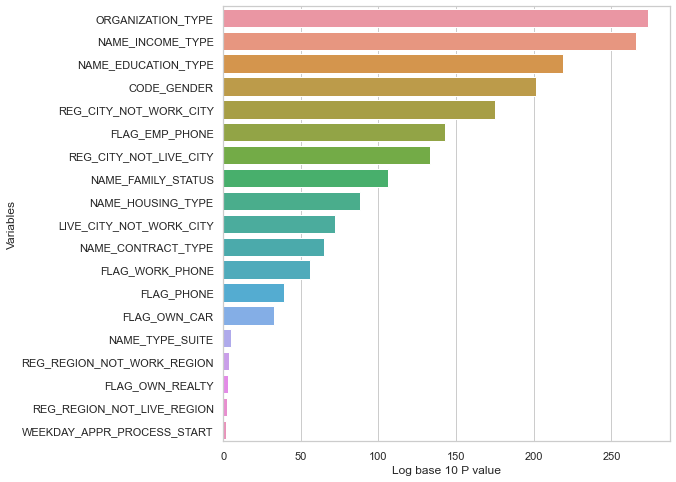

In [100]:
significant_variables=[]
for i in l:
    p=scipy.stats.chi2_contingency(pd.crosstab(adf2['TARGET'],adf2[i]))[1]
    if p<0.05 and p!=0:
        significant_variables.append((i,abs(math.log10((p)))))

plot=pd.DataFrame(significant_variables,columns=('VARIABLE','P VALUE')).sort_values(by='P VALUE',ascending=False)
plt.figure(figsize=[8,8])
sns.barplot(x='P VALUE', y='VARIABLE', data=plot)
plt.xlabel("Log base 10 P value")
plt.ylabel("Variables")
plt.show()

Above graph shows the variables which are significantly related to the TARGET variable. As we see, Organization Type and Income type have the highest relationship with the target variable. 

### Categorical Variable and Continuous binned variable

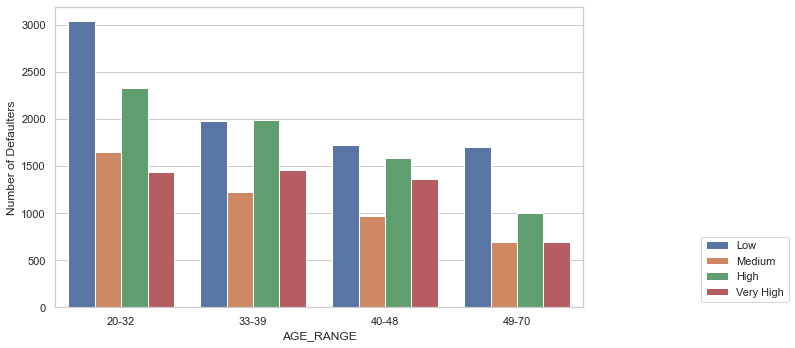

In [101]:
plt.figure(figsize=[12,5])
sns.countplot(t1.AGE_RANGE,hue=t1.INCOME_RANGE)
plt.legend(loc="lower right",bbox_to_anchor=(1.4,0))
plt.ylabel("Number of Defaulters")
plt.tight_layout()
plt.show()

As we see, the highest Defaulters are in the age group 20-32 who have a low income and the lowest defaulters are in the age group 49-70 with medium and very high income range.

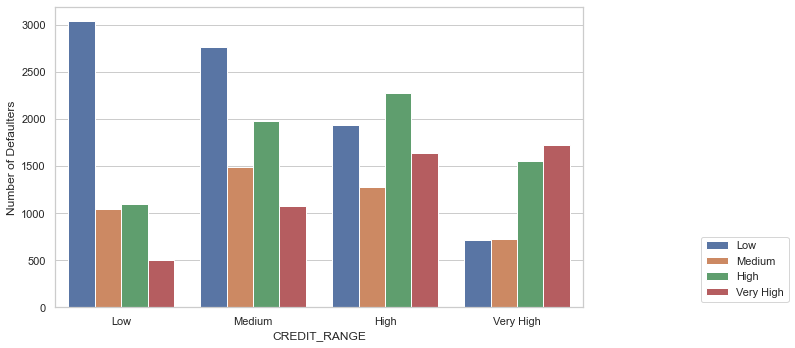

In [102]:
plt.figure(figsize=[12,5])
sns.countplot(t1.CREDIT_RANGE,hue=t1.INCOME_RANGE)
plt.legend(loc="lower right",bbox_to_anchor=(1.4,0))
plt.ylabel("Number of Defaulters")
plt.tight_layout()
plt.show()

As we see, the highest Defaulters are with low credit range who have a low income and the lowest defaulters are in very high credit range and medium and low income range.

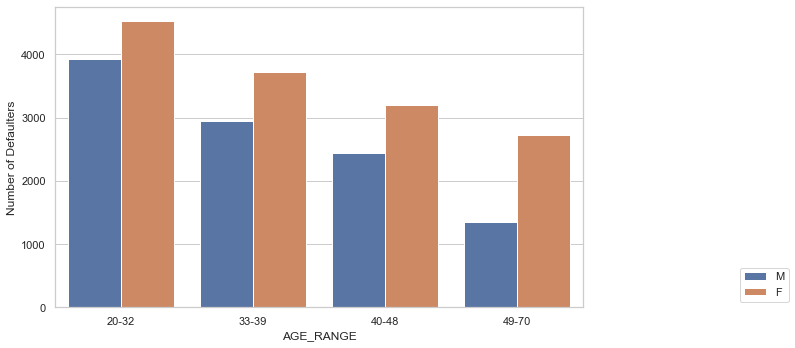

In [103]:
plt.figure(figsize=[12,5])
sns.countplot(t1.AGE_RANGE,hue=t1.CODE_GENDER)
plt.legend(loc="lower right",bbox_to_anchor=(1.4,0))
plt.ylabel("Number of Defaulters")
plt.tight_layout()
plt.show()

The highest number of defaulters are female in age group 20-32 years while the lowest number of defaulters are male in the age group 49-70

### Dealing with previous application data

In [104]:
pdf.shape

(1670214, 37)

In [105]:
pdf.SK_ID_CURR.nunique()

338857

In [106]:
pdf.SK_ID_CURR.value_counts().sort_values(ascending=False)[:15]

187868    77
265681    73
173680    72
242412    68
206783    67
156367    66
389950    64
382179    64
198355    63
345161    62
446486    62
238250    61
280586    61
227585    60
206862    60
Name: SK_ID_CURR, dtype: int64

Hence, we can see there are duplicate, the reason being one applicant must have taken more than one loans

In [107]:
#Checking missing values
pdf.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [108]:
missing = pdf.isnull().sum()
missing = missing[missing.values>(0.30*len(pdf))]
print('Columns with more than 30% missing data')
missing=missing.apply(lambda x:x/len(pdf)*100)
missing

Columns with more than 30% missing data


AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

Dropping such columns

In [109]:
pdf=pdf.drop(missing.index,axis=1)

In [110]:
pdf.isnull().sum().apply(lambda x:x/len(pdf)*100)[pdf.isnull().sum()!=0]


AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

In [111]:
l=['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION']
pdf.loc[:,l].describe().round(2)

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  CNT_PAYMENT
count   1297979.00  1670213.00       1284699.00   1297984.00
mean      15955.12   196114.02        227847.28        16.05
std       14782.14   318574.62        315396.56        14.57
min           0.00        0.00             0.00         0.00
25%        6321.78    24160.50         50841.00         6.00
50%       11250.00    80541.00        112320.00        12.00
75%       20658.42   216418.50        234000.00        24.00
max      418058.14  6905160.00       6905160.00        84.00

As the AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE appears to be skewed, we will replace the missing values in these columns bty the median and CNT_PAYMENT by mean

In [112]:
pdf.AMT_ANNUITY.fillna(pdf.AMT_ANNUITY.median(),inplace=True)
pdf.AMT_CREDIT.fillna(pdf.AMT_CREDIT.median(),inplace=True)
pdf.AMT_GOODS_PRICE.fillna(pdf.AMT_GOODS_PRICE.median(),inplace=True)
pdf.CNT_PAYMENT.fillna(pdf.CNT_PAYMENT.mean(),inplace=True)

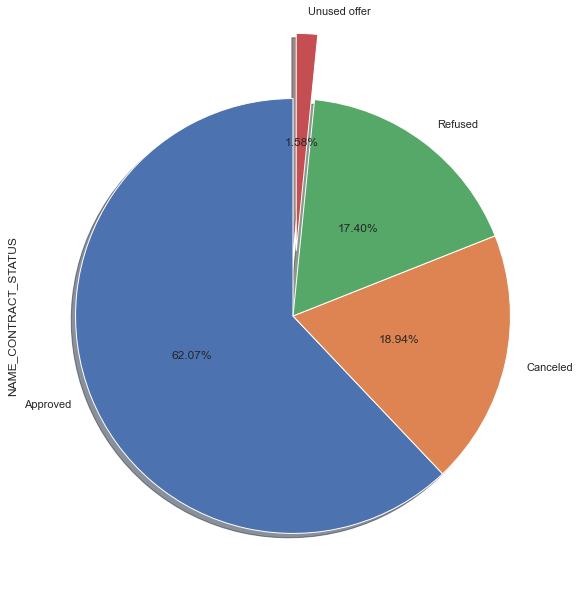

In [113]:
plt.figure(figsize=[10,10])
pdf.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot(kind = 'pie', explode = [0,0,0,0.3], autopct = '%.2f%%',
                                         startangle = 90,shadow = True, pctdistance = 0.5)
plt.show()

#### Merging the two datasets

In [114]:
df=adf.merge(pdf,how='inner', on='SK_ID_CURR')

In [115]:
missing = df.isnull().sum()
missing = missing[missing.values>(0.30*len(df))]
print('Columns with more than 30% missing data')
missing=missing.apply(lambda x:x/len(df)*100)
missing

Columns with more than 30% missing data


OWN_CAR_AGE                     66.294499
OCCUPATION_TYPE                 32.367523
EXT_SOURCE_1                    56.366870
APARTMENTS_AVG                  50.364115
BASEMENTAREA_AVG                58.308511
YEARS_BEGINEXPLUATATION_AVG     48.431882
YEARS_BUILD_AVG                 66.298107
COMMONAREA_AVG                  69.689347
ELEVATORS_AVG                   52.996779
ENTRANCES_AVG                   49.995155
FLOORSMAX_AVG                   49.409882
FLOORSMIN_AVG                   67.670604
LANDAREA_AVG                    59.218533
LIVINGAPARTMENTS_AVG            68.214566
LIVINGAREA_AVG                  49.826661
NONLIVINGAPARTMENTS_AVG         69.296549
NONLIVINGAREA_AVG               54.860115
APARTMENTS_MODE                 50.364115
BASEMENTAREA_MODE               58.308511
YEARS_BEGINEXPLUATATION_MODE    48.431882
YEARS_BUILD_MODE                66.298107
COMMONAREA_MODE                 69.689347
ELEVATORS_MODE                  52.996779
ENTRANCES_MODE                  49

In [116]:
df=df.drop(missing.index,axis=1)

In [117]:
df.shape

(1413701, 97)

In [118]:
df.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [119]:
l=["NAME_CONTRACT_STATUS","TARGET","SK_ID_CURR"]
df.loc[:,l].head()

NAME_CONTRACT_STATUS  TARGET  SK_ID_CURR
0             Approved       1      100002
1             Approved       0      100003
2             Approved       0      100003
3             Approved       0      100003
4             Approved       0      100004

In [120]:
df.select_dtypes("object").head()

NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           Cash loans           M            N               Y   
1           Cash loans           F            N               N   
2           Cash loans           F            N               N   
3           Cash loans           F            N               N   
4      Revolving loans           M            Y               Y   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START_x  \
0  Single / not married  House / apartment                    WEDNESDAY   
1               Married  House / apartment                       MONDAY   
2               Married  House / apartment                       MONDAY   
3               Married  House / apartment                       MONDAY   
4  Single / not married  House / apartment                       MONDAY   

        ORGANIZATION_TYPE NAME_CONTRACT_TYPE_y WEEKDAY_APPR_PROCESS_START_y  \
0  Business Entity Type 3       Consumer loans                     SATURDAY   
1                  School           Cash loans                       FRIDAY   
2                  School       Consumer loans                       SUNDAY   
3                  School       Consumer loans                     SATURDAY   
4              Government       Consumer loans                       FRIDAY   

  FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                           Y                    XAP             Approved   
1                           Y                    XNA             Approved   
2                           Y                    XAP             Approved   
3                           Y                    XAP             Approved   
4                           Y                    XAP             Approved   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0                    XNA                XAP              New   
1                    XNA                XAP         Repeater   
2  Cash through the bank                XAP        Refreshed   
3  Cash through the bank                XAP        Refreshed   
4  Cash through the bank                XAP              New   

    NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Vehicles            POS               XNA   
1                   XNA           Cash            x-sell   
2             Furniture            POS               XNA   
3  Consumer Electronics            POS               XNA   
4                Mobile            POS               XNA   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
0                    Stone       Auto technology       low_normal   
1  Credit and cash offices                   XNA       low_normal   
2                    Stone             Furniture           middle   
3             Country-wide  Consumer electronics           middle   
4         Regional / Local          Connectivity           middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest

In [121]:
df.CODE_GENDER.value_counts()

F      955139
M      458507
XNA        55
Name: CODE_GENDER, dtype: int64

We see that gender has 55 rows with XNA values, as the number of rows are very insignificant, we'll remove these rows.

In [122]:
df=df[~(df.CODE_GENDER=="XNA")]

In [123]:
df.CODE_GENDER.value_counts()

F    955139
M    458507
Name: CODE_GENDER, dtype: int64

Now dividing the dataset on the basis of Contract status and Target variable

In [124]:
approved=df[df.NAME_CONTRACT_STATUS=='Approved']
refused=df[df.NAME_CONTRACT_STATUS=='Refused']
canceled=df[df.NAME_CONTRACT_STATUS=='Canceled']
unused=df[df.NAME_CONTRACT_STATUS=='Unused offer']

In [125]:
dt1=df[df.TARGET==1]
dt0=df[df.TARGET==0]

### Univariate Analysis

Approved        54.955051
Refused         24.058516
Canceled        19.450801
Unused offer     1.535633
Name: NAME_CONTRACT_STATUS, dtype: float64


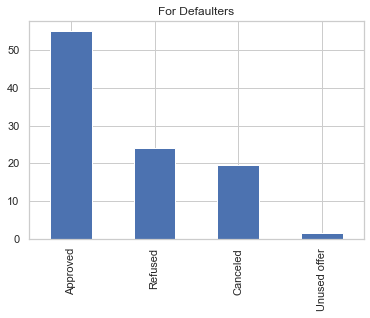

In [126]:
print(dt1.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100)
(dt1.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.title("For Defaulters")
plt.show()

Approved        63.412211
Canceled        18.248010
Refused         16.721857
Unused offer     1.617922
Name: NAME_CONTRACT_STATUS, dtype: float64


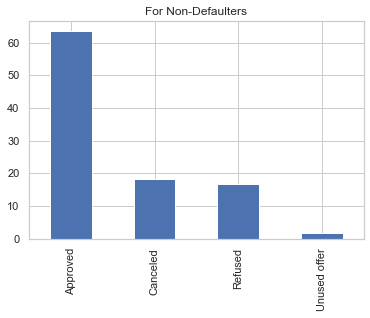

In [127]:
print(dt0.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100)
(dt0.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.title("For Non-Defaulters")
plt.show()

After having divided the merged dataset on the basis of target variable, we saw how many of the applicants were Accepted and Rejected for the two datasets.

We saw that for defaulters 24% of the applications are rejected while for non-defaulters, 16% of the applications are rejected. Defaulters also have a slightly high percentage for cancelled applications.


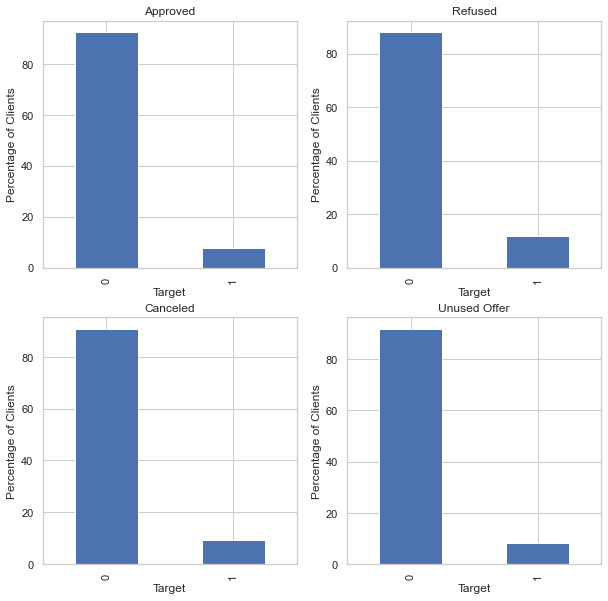

In [128]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
(approved.TARGET.value_counts(normalize=True)*100).plot.bar()
plt.title("Approved")
plt.ylabel("Percentage of Clients")
plt.xlabel("Target")
plt.subplot(2,2,2)
(refused.TARGET.value_counts(normalize=True)*100).plot.bar()
plt.title("Refused")
plt.ylabel("Percentage of Clients")
plt.xlabel("Target")
plt.subplot(2,2,3)
(canceled.TARGET.value_counts(normalize=True)*100).plot.bar()
plt.title("Canceled")
plt.ylabel("Percentage of Clients")
plt.xlabel("Target")
plt.subplot(2,2,4)
(unused.TARGET.value_counts(normalize=True)*100).plot.bar()
plt.title("Unused Offer")
plt.ylabel("Percentage of Clients")
plt.xlabel("Target")
plt.show()

Loans which were previously refused have a higher % of default followed by previously Cancelled loans.

#### Segmented Univariate Analysis

In [129]:
df.select_dtypes("object").head()

NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           Cash loans           M            N               Y   
1           Cash loans           F            N               N   
2           Cash loans           F            N               N   
3           Cash loans           F            N               N   
4      Revolving loans           M            Y               Y   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START_x  \
0  Single / not married  House / apartment                    WEDNESDAY   
1               Married  House / apartment                       MONDAY   
2               Married  House / apartment                       MONDAY   
3               Married  House / apartment                       MONDAY   
4  Single / not married  House / apartment                       MONDAY   

        ORGANIZATION_TYPE NAME_CONTRACT_TYPE_y WEEKDAY_APPR_PROCESS_START_y  \
0  Business Entity Type 3       Consumer loans                     SATURDAY   
1                  School           Cash loans                       FRIDAY   
2                  School       Consumer loans                       SUNDAY   
3                  School       Consumer loans                     SATURDAY   
4              Government       Consumer loans                       FRIDAY   

  FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                           Y                    XAP             Approved   
1                           Y                    XNA             Approved   
2                           Y                    XAP             Approved   
3                           Y                    XAP             Approved   
4                           Y                    XAP             Approved   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0                    XNA                XAP              New   
1                    XNA                XAP         Repeater   
2  Cash through the bank                XAP        Refreshed   
3  Cash through the bank                XAP        Refreshed   
4  Cash through the bank                XAP              New   

    NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Vehicles            POS               XNA   
1                   XNA           Cash            x-sell   
2             Furniture            POS               XNA   
3  Consumer Electronics            POS               XNA   
4                Mobile            POS               XNA   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
0                    Stone       Auto technology       low_normal   
1  Credit and cash offices                   XNA       low_normal   
2                    Stone             Furniture           middle   
3             Country-wide  Consumer electronics           middle   
4         Regional / Local          Connectivity           middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest

In [131]:
categorical= ['CODE_GENDER','NAME_CONTRACT_TYPE_x','FLAG_OWN_CAR',
 'FLAG_OWN_REALTY','NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE','NAME_SELLER_INDUSTRY']

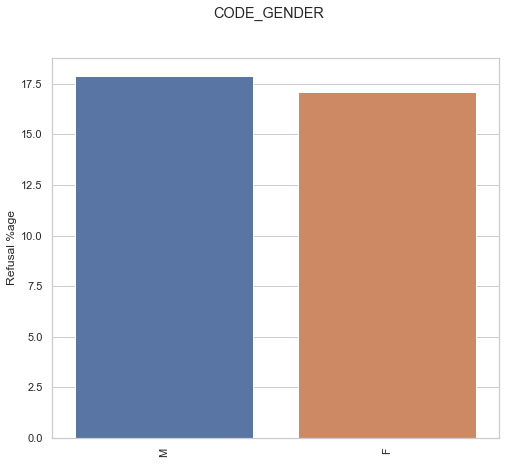

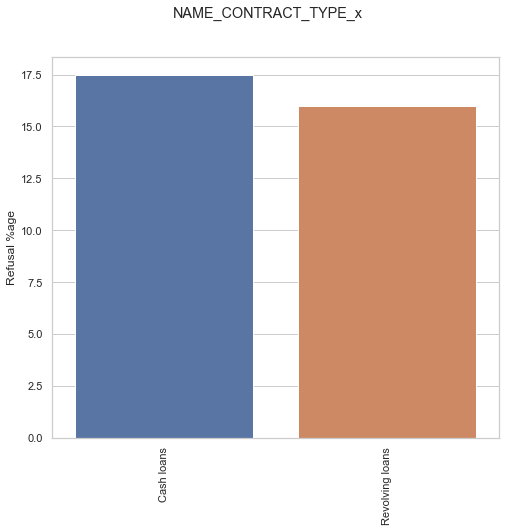

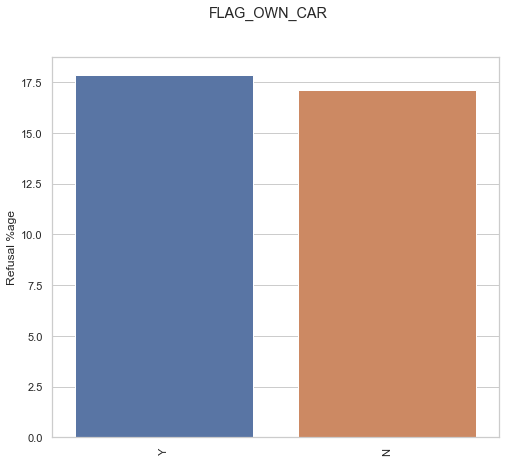

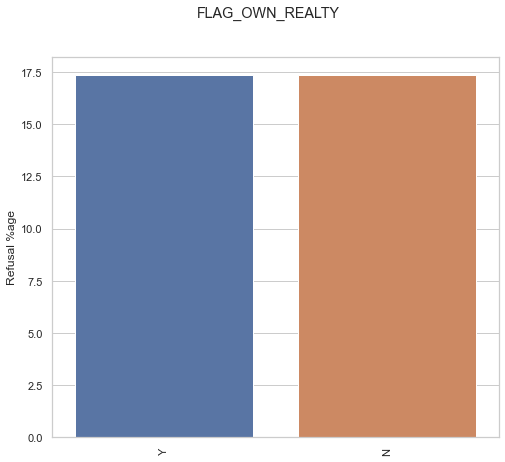

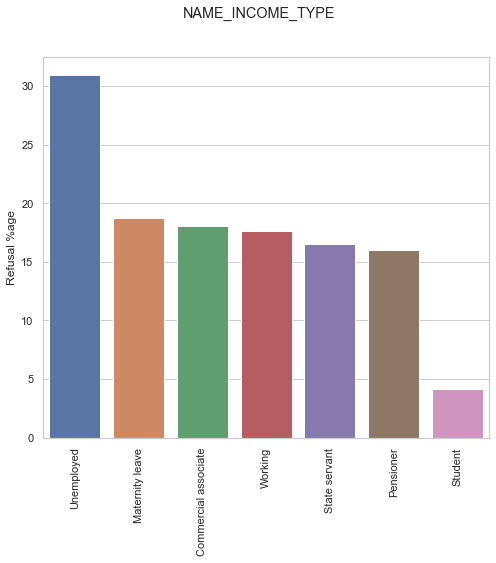

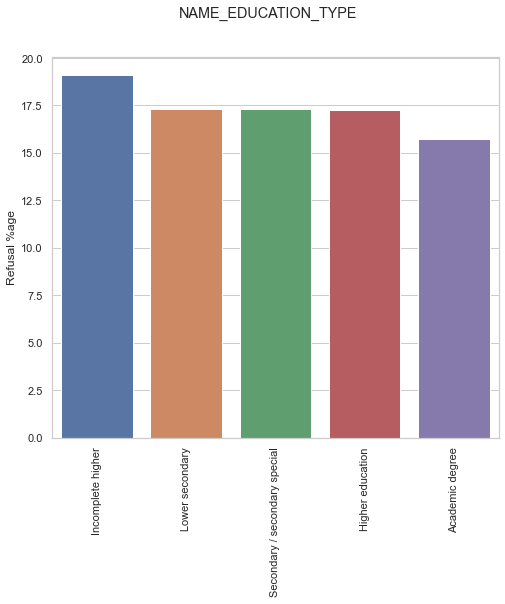

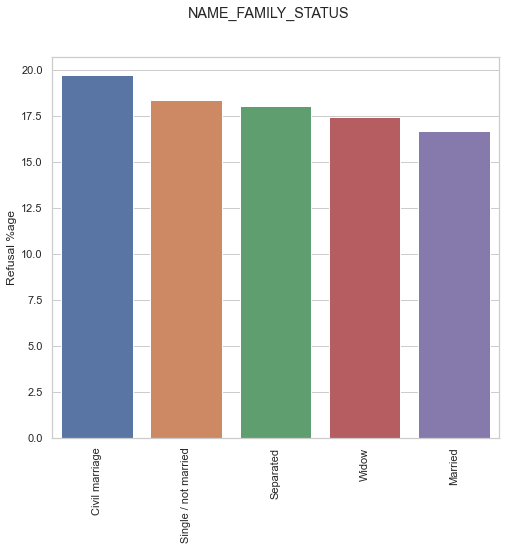

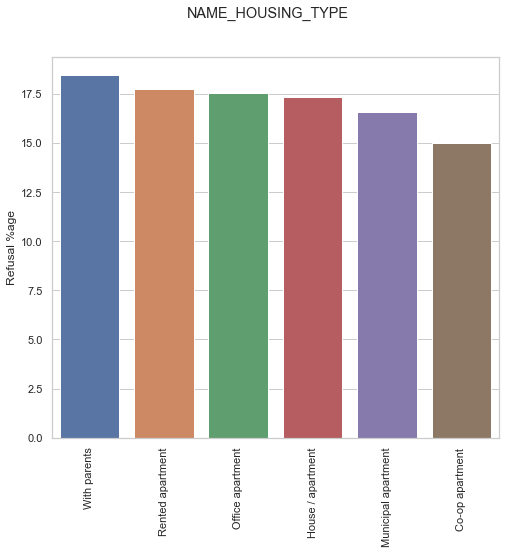

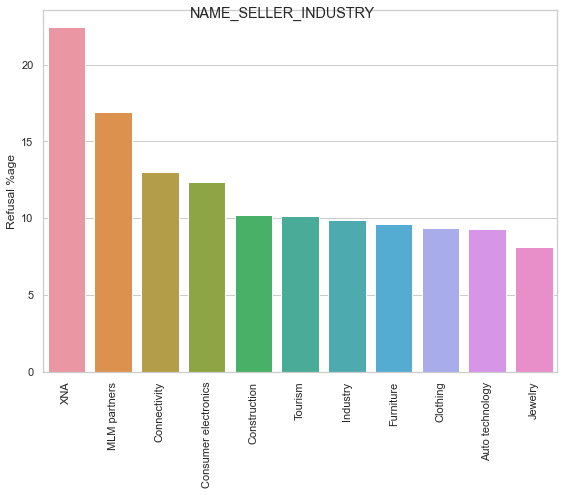

In [132]:
for i in categorical:
    plt.figure(figsize=[8,7])
    a=refused[i].value_counts()/df[i].value_counts()*100
    a.sort_values(ascending=False,inplace=True)
    sns.barplot(a.index,a.values)
    plt.xticks(rotation=90)
    plt.ylabel("Refusal %age")
    plt.suptitle(i)
plt.tight_layout()
plt.show()

The few inferences that can be drawn from the above graphs are:
    1. Though not significantly, the refusal rate for men is higher as compared to refusal rate for woman which makes sense as we inferred before that default rate for men is more than that women.
    2. Here we see that the refusal rate of loan is maximum for the unemployed (going up to 30) and minimum for student, which also makes sense because we know student loans are easier to get and also as notice in our previous analysis, students had the least default rate among all.
    3. As noticed here, people with Academic Degree have the lowest refusal rate (they has the lowest default rate) and people with incomplete higher and lower secondary have he highest refusal rate, which also goes along with our previous analysis.
    4. Refusal rate for Civil Marriage and Single people is more, also the default rate for them is more. 
    5. Refusal rate for people living with parents is the highest and those living in the co-op apartment is the lowest.
    6. XNA are those applicants who haven’t specified the Seller Industry name. MLM partners have the highest refusal rate and Jewelry partners have the lowest refusal rate.


FEW BUSINESS SUGGESTIONS:-

    1. As the default rate for people owning an office apartment is the least, the refusal rate for such client's should be reduced. People with Rented Apartment and those living with parents have high default rate and also high refusal rate, which works in the favour of the bank.

    2. As the default rate for widows is as low as 5%, less widows should be refused the loan.

    3. Bank should continue giving student loans with less refusal as students have the lowest default rate. Women on maternity leave have the highest default rate, as high as 37%, for the sake of business, the client's on maternity loans should be given making sure of other factors.